# Chi<sup>2</sup> fitting

## SV fitting (m/M)

In [126]:
# rdict = {12:(-0.6,-0.4), 13:(-1.9,-0.4), 14:(-2.8,-0.6), 'ALL':(-0.8,-0.5)}
alpha=0.8

In [12]:
ReducedChi2dict_SV0 = ReducedChi2dict_gen(cc_SV0, sh_SV0, centrals_mask_SV0, 'SV', 
                                      {12:(-1.3,-0.4), 13:(-1.9,-0.4), 14:(-2.8,-0.6), 'ALL':(-3.0, -0.4)}, 
                                      {12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
                                      {12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_SV0['M'].max()}, mlim=OBJECTMASSCUT['SV'])
pcolorplots(ReducedChi2dict_SV0, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_SV0['M'].max()})

SV 61500
SV 61500

SV 40628
SV 40628

SV 4797
SV 4797

SV 337
SV 337



In [13]:
ReducedChi2dict_SV1 = ReducedChi2dict_gen(cc_SV1, sh_SV1, centrals_mask_SV1, 'SV', 
                                      {12:(-1.3,-0.4), 13:(-1.9,-0.4), 14:(-2.8,-0.6), 'ALL':(-3.0, -0.4)}, 
                                      {12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
                                      {12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_SV1['M'].max()}, mlim=OBJECTMASSCUT['SV'])

SV 47554
SV 47554

SV 34592
SV 34592

SV 2418
SV 2418

SV 36
SV 36



In [14]:
ReducedChi2dict_SVavg = {k:((ReducedChi2dict_SV0[k]+ReducedChi2dict_SV1[k])/2.0) for k in ReducedChi2dict_SV0.keys()}

SV 40628
12
SV 40628

SV 4797
12
SV 4797

SV 337
17
SV 337



Text(0,0.5,'$\\log \\left[ \\mathrm{d}n/\\mathrm{d} \\log(m/M) \\right]$')

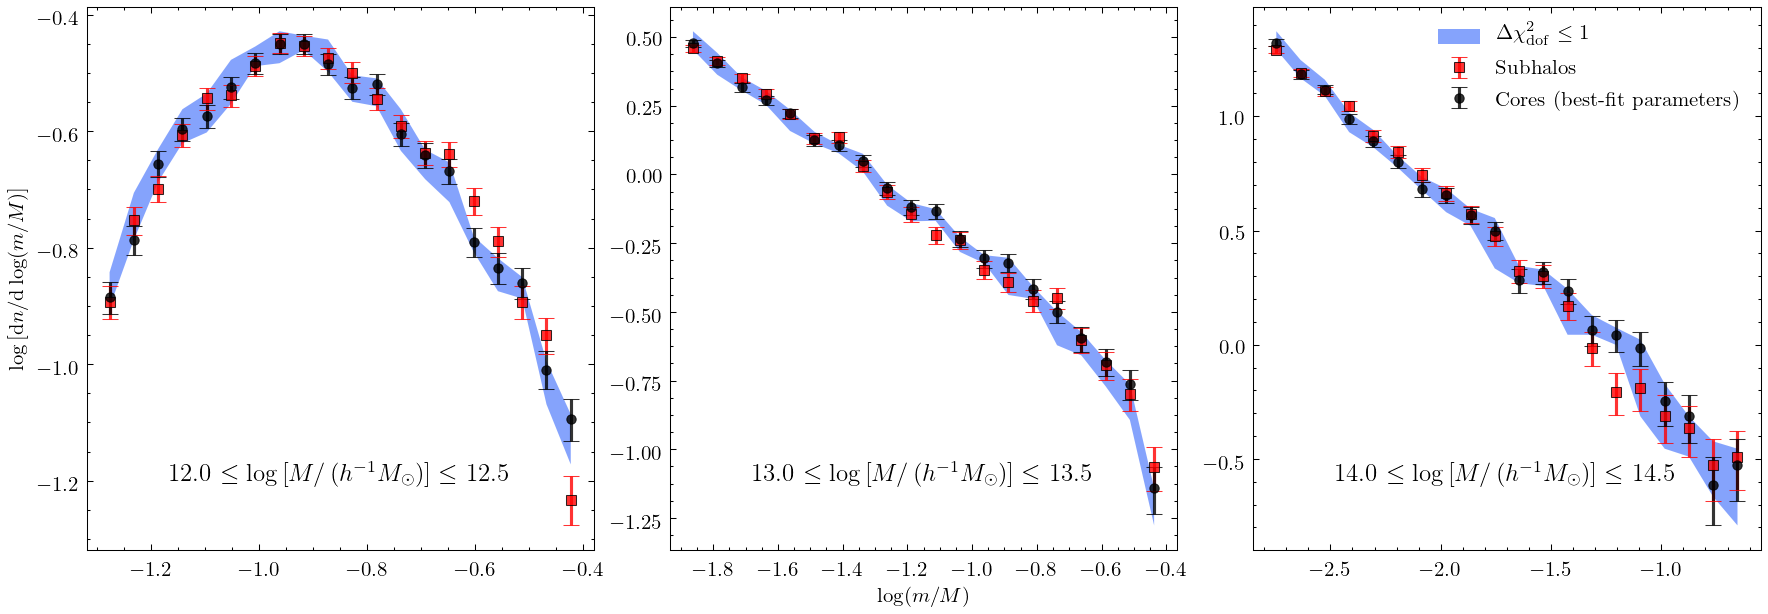

In [34]:
bins = 20
alpha = .8
label = 'SV'

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, sharey=False, gridspec_kw={'hspace': 0, 'wspace': .15}, figsize=[4.8*3,4.8*1], dpi=150)
for Mlabel, ax in zip( (12, 13, 14), (ax1, ax2, ax3) ):
    ReducedChi2 = ReducedChi2dict[Mlabel]
    
    M1, M2 = M1dict[Mlabel], M2dict[Mlabel]
    r = rdict[Mlabel]
    
    x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh = subhalo_plot(sh, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label])
    
    Avals, zvals = np.unravel_index( np.flatnonzero(mask_ReducedChi2_gen(ReducedChi2)), ReducedChi2.shape )
    best_ys = np.zeros((len(Avals), bins), dtype=np.float64)
    print len(Avals)
    for i, (A, zeta) in enumerate(zip(A_arr[Avals], zeta_arr[zvals])):
        _, y, _, _, _ = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=A, zeta=zeta, verbose=False)
        best_ys[i] = y
    
    Abfi, zetabfi = np.unravel_index(ReducedChi2.argmin(), ReducedChi2.shape)
    Abf, zetabf =  A_arr[Abfi], zeta_arr[zetabfi]
    x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=Abf, zeta=zetabf, verbose=True)
    assert nH_cores==nH_sh
    
    ax.fill_between(x, np.amin(best_ys, axis=0), np.amax(best_ys, axis=0), label=r'$\Delta \chi^2_{\mathrm{dof}} \le 1$', alpha=0.5)
    errorbar(ax, x_sh, y_sh, yerr=yerr_log_sh, label='Subhalos', c='r', alpha=alpha, marker='s')
    errorbar(ax, x, y, yerr=yerr_log, label='Cores (best-fit parameters)', c='k', alpha=alpha )
    print ''
    ax.set_title(r'{} $\le \log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \le$ {}'.format(np.log10(M1), np.log10(M2)), y=0.1, x=0.5)

ax3.legend(loc=1)
ax2.set_xlabel(r'$\log(m/M)$')
ax1.set_ylabel(r'$\log \left[ \mathrm{d}n/\mathrm{d} \log(m/M) \right]$')
    
# plt.savefig('Paper2Figs/1sigma_z0.pdf')

SV 474
SV 474
SV 474
(-2.0337499737739564, -0.4662500262260437)


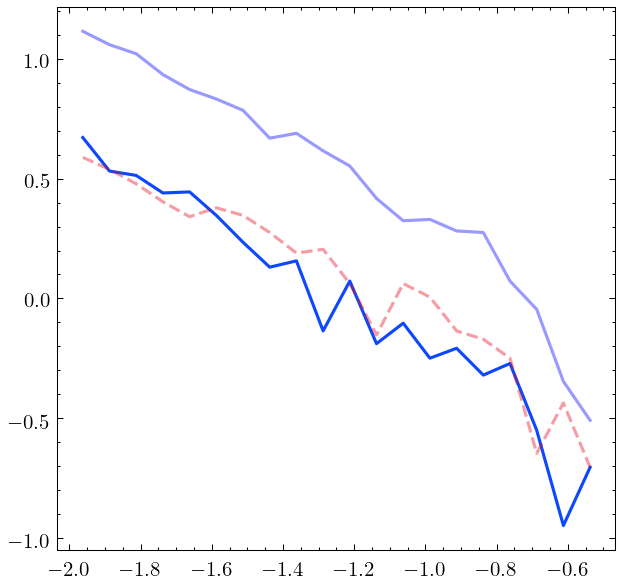

In [91]:
#testing: determine range
M1, M2 = 10**13.2, 10**13.3
r=(-2,-0.5)
bins = 20
alpha = .8
label = 'SV'

x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh, bin_mask_sh_100 = subhalo_plot(sh, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], returnMask=True)
plt.plot(x_sh, y_sh, label='subhalos 100mp')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=0.4, zeta=0.3)
plt.plot(x, y, 'b-', alpha=0.4, label='cores 1')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=0.9, zeta=0.001)
plt.plot(x, y, alpha=0.4, label='cores 100mp')

print plt.xlim()
# plt.axvline(-2.)

SV 40628
SV 40628
SV 40628
SV 40628
SV 40628
SV 40628
SV 40628
1.9446791e+12
1.8971367e+12


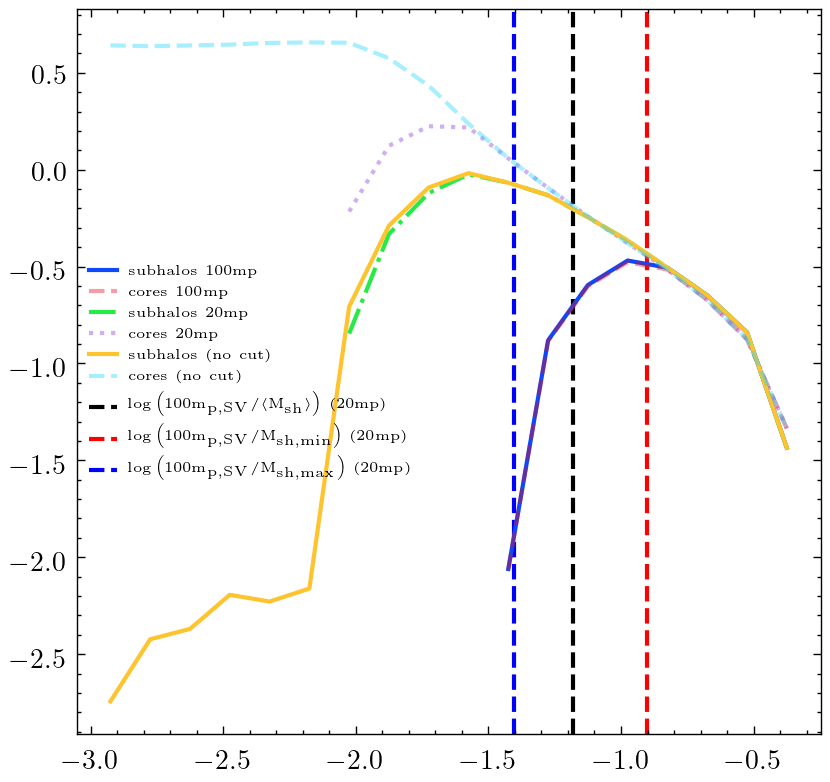

In [62]:
#testing: determine range
M1, M2 = 10**12.0, 10**12.5
r=(-3.,0)#(-0.8,-0.5)#(-0.6,-0.4)
bins = 20
alpha = .8
label = 'SV'
plt.figure(dpi=200)
x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh, bin_mask_sh_100 = subhalo_plot(sh, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], returnMask=True)
plt.plot(x_sh, y_sh, label='subhalos 100mp')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=0.4, zeta=0.3)
# plt.plot(x, y, '-', alpha=0.4, label='cores 1')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=0.9, zeta=0.001)
plt.plot(x, y, alpha=0.4, label='cores 100mp')

x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh, bin_mask_sh_20 = subhalo_plot(sh, M1, M2, label, bins, r, mlim=SUBHALOMINMASS[label], returnMask=True)
plt.plot(x_sh, y_sh, label='subhalos 20mp')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=SUBHALOMINMASS[label], A=0.9, zeta=0.001)
plt.plot(x, y, alpha=0.4, label='cores 20mp')

x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh = subhalo_plot(sh, M1, M2, label, bins, r, mlim=0)
plt.plot(x_sh, y_sh, label='subhalos (no cut)')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=0, A=0.9, zeta=0.001)
plt.plot(x, y, alpha=0.4, label='cores (no cut)')

# plt.axvline(-3.0, label='Fitting range')
# plt.axvline(-0.4)

# plt.axvline(  np.log10(100.*PARTICLEMASS[label]/np.mean(sh['M'][bin_mask_sh_100])), ymax=1., ls='--', c='r', label=r'$\log \left(\mathrm{100m_{p,'+label+ r'}/\langle M_{sh} \rangle}\right)$ (100mp)' )
plt.axvline(  np.log10(100*PARTICLEMASS[label]/np.mean(sh['M'][bin_mask_sh_20])), ymax=1., c='k', ls='--', label=r'$\log \left(\mathrm{100m_{p,'+label+ r'}/\langle M_{sh} \rangle}\right)$ (20mp)', zorder=0 )

plt.axvline(  np.log10(100*PARTICLEMASS[label]/np.min(sh['M'][bin_mask_sh_20])), ymax=1., c='r', ls='--', label=r'$\log \left(\mathrm{100m_{p,'+label+ r'}/ M_{sh, min} }\right)$ (20mp)', zorder=0 )
plt.axvline(  np.log10(100*PARTICLEMASS[label]/np.max(sh['M'][bin_mask_sh_20])), ymax=1., c='b', ls='--', label=r'$\log \left(\mathrm{100m_{p,'+label+ r'}/M_{sh, max} }\right)$ (20mp)', zorder=0)

# plt.axvline(  np.log10(20.*PARTICLEMASS[label]/np.mean(sh['M'][bin_mask_sh_100])), ymax=1., ls='--', c='r', label=r'$\log \left(\mathrm{20m_{p,'+label+ r'}/\langle M_{sh} \rangle}\right)$ (100mp)' )
# plt.axvline(  np.log10(20.*PARTICLEMASS[label]/np.mean(sh['M'][bin_mask_sh_20])), ymax=1., ls='--', label=r'$\log \left(\mathrm{20m_{p,'+label+ r'}/\langle M_{sh} \rangle}\right)$ (20mp)',zorder=0)

print np.format_float_scientific( np.mean(sh['M'][bin_mask_sh_100]) )
print np.format_float_scientific( np.mean(sh['M'][bin_mask_sh_20]) )
        
plt.legend(fontsize=5)
# plt.axvline(-0.9)
# plt.axvline(-1.2)



## SV fitting (m)

In [9]:
exec(open('paper2plotscripts.py').read())

SV nH cores 40628
SV nH_sh 40628
SV number of subhalos in bin 8964

SV nH cores 4797
SV nH_sh 4797
SV number of subhalos in bin 11395

SV nH cores 337
SV nH_sh 337
SV number of subhalos in bin 6886

SV nH cores 61500
SV nH_sh 61500
SV number of subhalos in bin 51612

A 0.9 zeta 0.02
12.0 12.5
0.8807934665564428 506.08576068970524

A 1.0 zeta 0.02
13.0 13.5
1.6555843055159705 930.7378570619708

A 1.0 zeta 0.001
14.0 14.5
4.848130473566919 674.7279316100191

A 0.9 zeta 0.001
12.0 15.071189
5.996716100564354 4198.039551104452



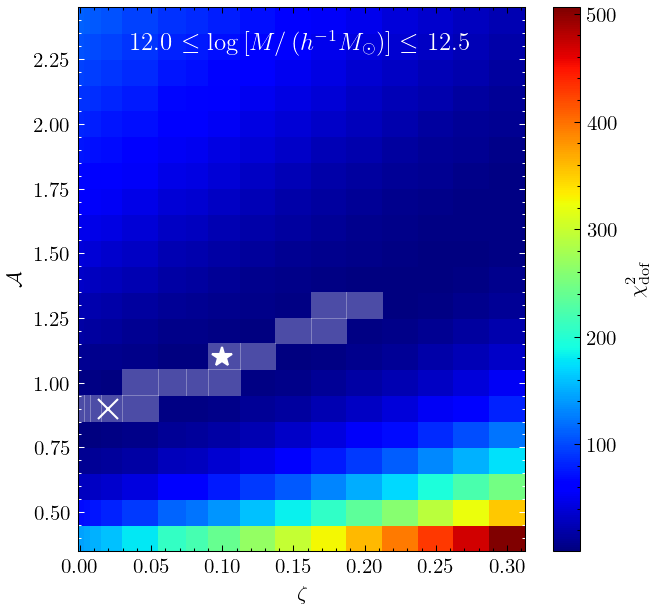

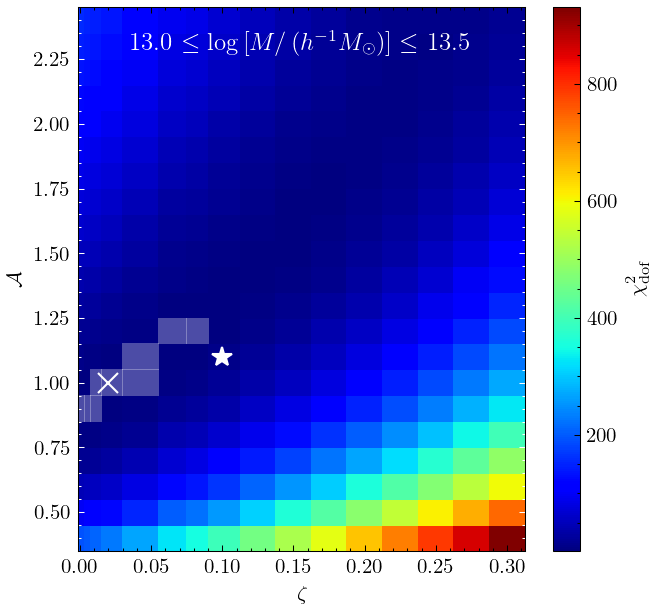

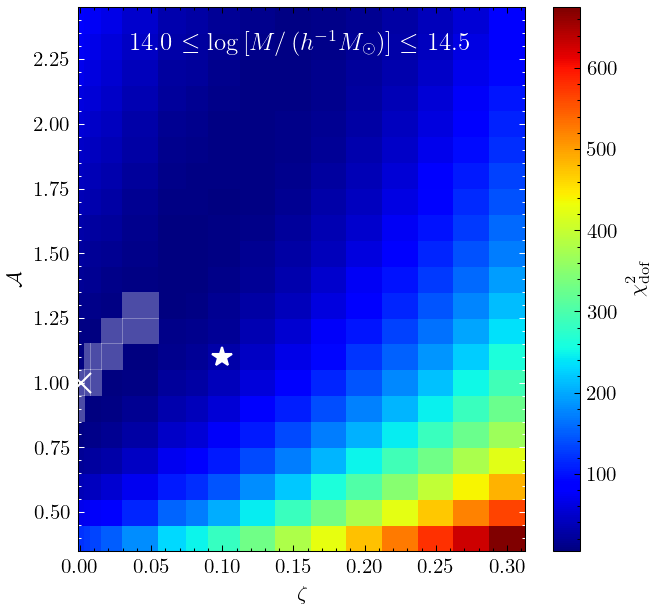

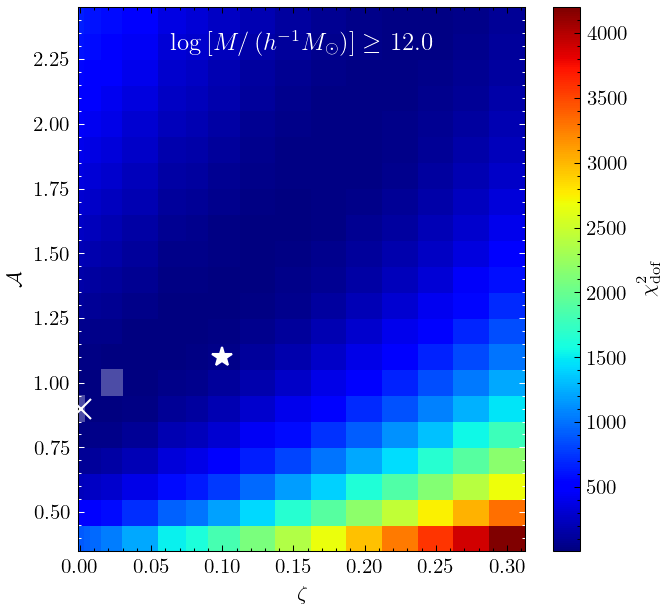

In [10]:
rlim = np.log10(OBJECTMASSCUT['SV'])
ReducedChi2dict_SV0_mplot = ReducedChi2dict_gen(cc_SV0, sh_SV0, centrals_mask_SV0, 'SV',
                                                     {12:(rlim, 11.9), 13:(rlim, 12.5), 14:(rlim, 13.0), 100:(rlim, 13.0)},
                                                     {12:10**12.0, 13:10**13.0, 14:10**14.0, 100:10**12.0},
                                                     {12:10**12.5, 13:10**13.5, 14:10**14.5, 100:cc_SV0['M'].max()}, mlim=OBJECTMASSCUT['SV'], mplot=True, dlog=False)
pcolorplots(ReducedChi2dict_SV0_mplot,
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 100:10**12.0},
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 100:cc_SV0['M'].max()},
            markfiducialparams=True)

SV nH cores 34592
SV nH_sh 34592
SV number of subhalos in bin 9485

SV nH cores 2418
SV nH_sh 2418
SV number of subhalos in bin 6816

SV nH cores 36
SV nH_sh 36
SV number of subhalos in bin 707


/home/isultan/projects/itk/itk.py:158: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:174: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)



SV nH cores 47554
SV nH_sh 47554
SV number of subhalos in bin 30121

A 1.6 zeta 0.2
12.0 12.5
1.3971529060151022 605.4152809074274

A 2.4 zeta 0.275
13.0 13.5
1.4013272480096135 431.6465866355945

A 1.9 zeta 0.2
14.0 14.5
0.6458966623732025 52.850166078341005

A 2.0 zeta 0.25
12.0 14.508623
1.7136424145715563 1960.8807009959066



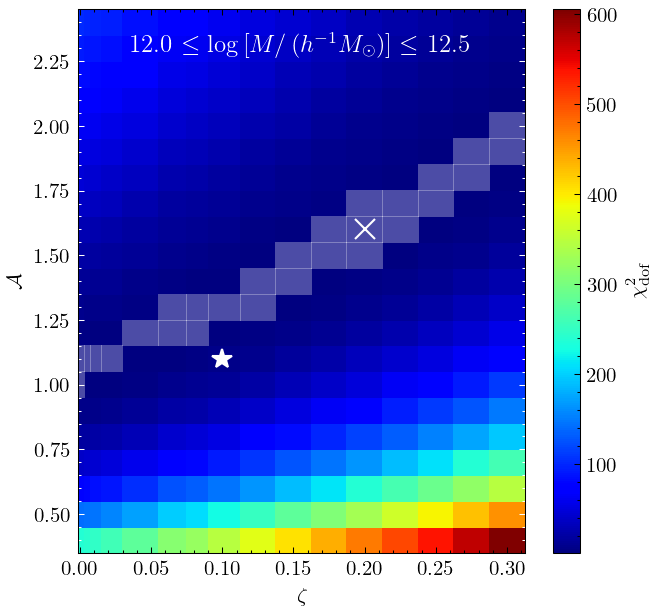

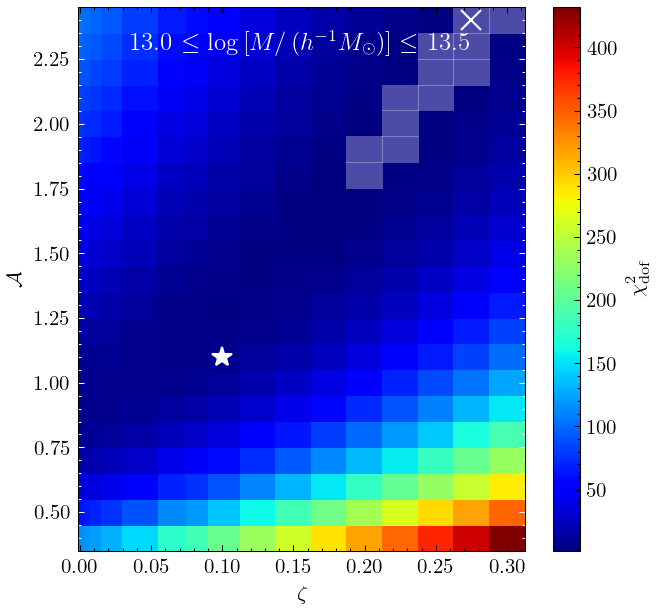

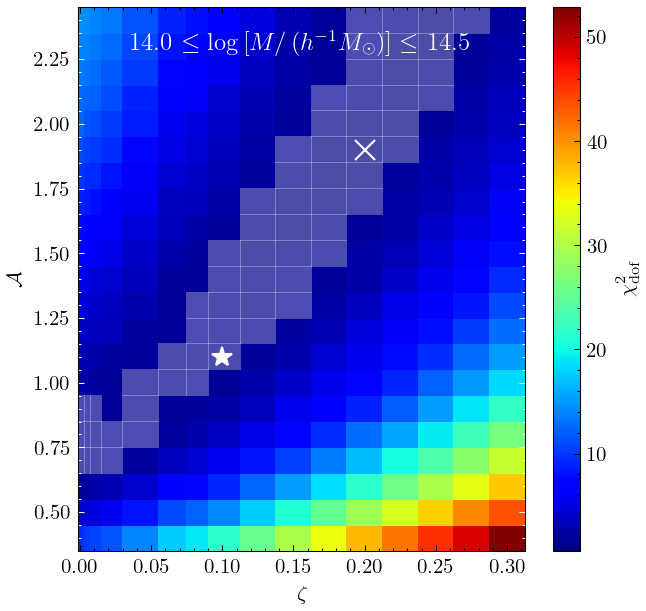

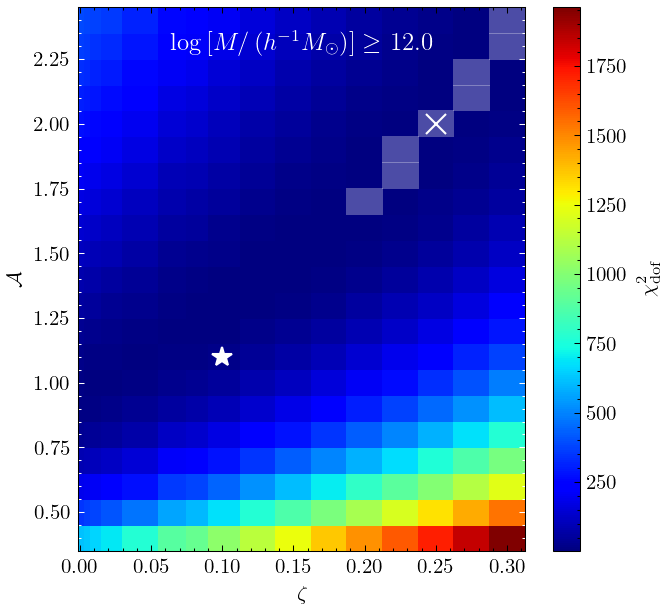

In [11]:
rlim = np.log10(OBJECTMASSCUT['SV'])
ReducedChi2dict_SV1_mplot = ReducedChi2dict_gen(cc_SV1, sh_SV1, centrals_mask_SV1, 'SV',
                                                     {12:(rlim, 11.9), 13:(rlim, 12.5), 14:(rlim, 13.0), 100:(rlim, 13.0)},
                                                     {12:10**12.0, 13:10**13.0, 14:10**14.0, 100:10**12.0},
                                                     {12:10**12.5, 13:10**13.5, 14:10**14.5, 100:cc_SV1['M'].max()}, mlim=OBJECTMASSCUT['SV'], mplot=True, dlog=False)
pcolorplots(ReducedChi2dict_SV1_mplot,
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 100:10**12.0},
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 100:cc_SV1['M'].max()},
           markfiducialparams=True)

A 1.0 zeta 0.02
12.0 12.5
2.838315459531133 555.7505207985663

A 1.3 zeta 0.1
13.0 13.5
3.6959864971872936 681.1922218487827

A 0.9 zeta 0.001
14.0 14.5
3.570063629948219 363.78904884418006

A 1.0 zeta 0.02
12.0 15.071189
7.69538690169702 3079.460126050179



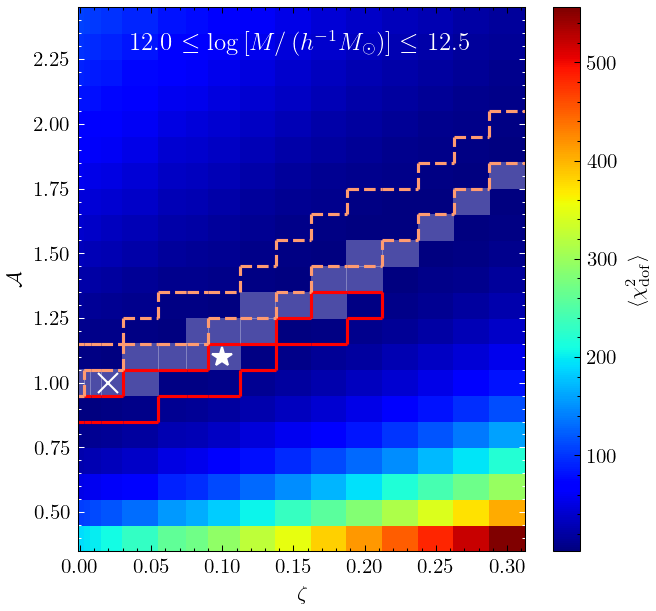

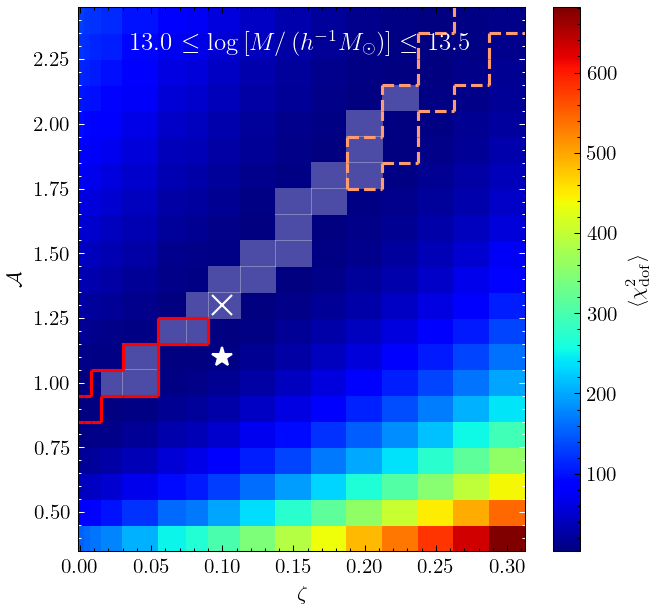

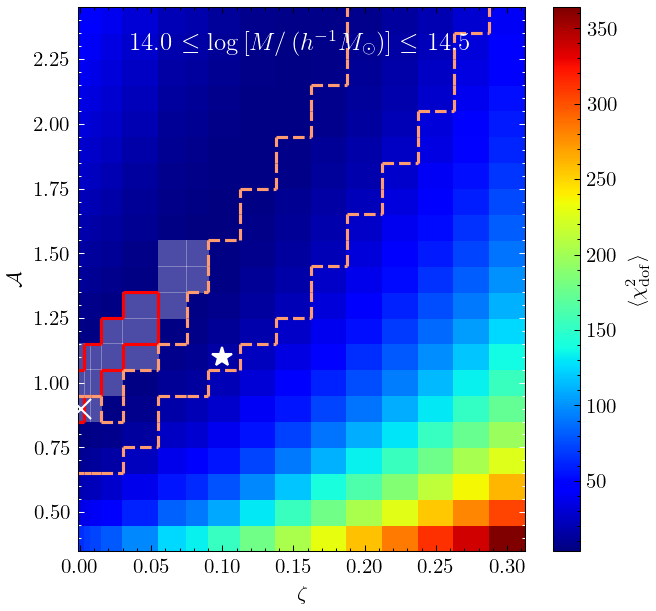

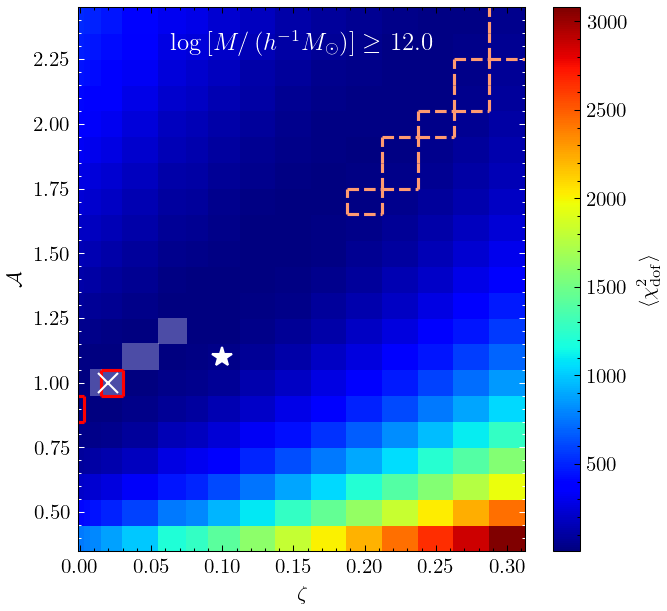

In [12]:
ReducedChi2dict_SVavg_mplot = {k:((ReducedChi2dict_SV0_mplot[k]+ReducedChi2dict_SV1_mplot[k])/2.0) for k in ReducedChi2dict_SV0_mplot.keys()}
pcolorplots(ReducedChi2dict_SVavg_mplot, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 100:10**12.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 100:cc_SV0['M'].max()},
            avgchi2=True,
            markfiducialparams=True,
            ReducedChi2dict_outline0=ReducedChi2dict_SV0_mplot,
            ReducedChi2dict_outline1=ReducedChi2dict_SV1_mplot,
            outfile=None)#'Paper2Figs/paramexploration_SVavg_mplot_fidstar_outline01')

### $\Delta\chi_{\mathrm{dof}}^2 \le \{1,2,\ldots,10\}$

### sigma1plots (Fig 4)

SV nH_sh 40628
SV number of subhalos in bin 8964
len(Avals) 22
Abf:  1.0 zetabf:  0.02
SV nH cores 40628
xlim:  (11.07903847694397, 11.918065214157105) 
ylim:  (-1.6, 0.0)

SV nH_sh 4797
SV number of subhalos in bin 11395
len(Avals) 19
Abf:  1.3 zetabf:  0.1
SV nH cores 4797
xlim:  (11.065538835525512, 12.531565237045289) 
ylim:  (-0.64, 0.83)

SV nH_sh 337
SV number of subhalos in bin 6886
len(Avals) 20
Abf:  0.9 zetabf:  0.001
SV nH cores 337
xlim:  (11.05428867340088, 13.042814445495605) 
ylim:  (-0.65, 1.8)



findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


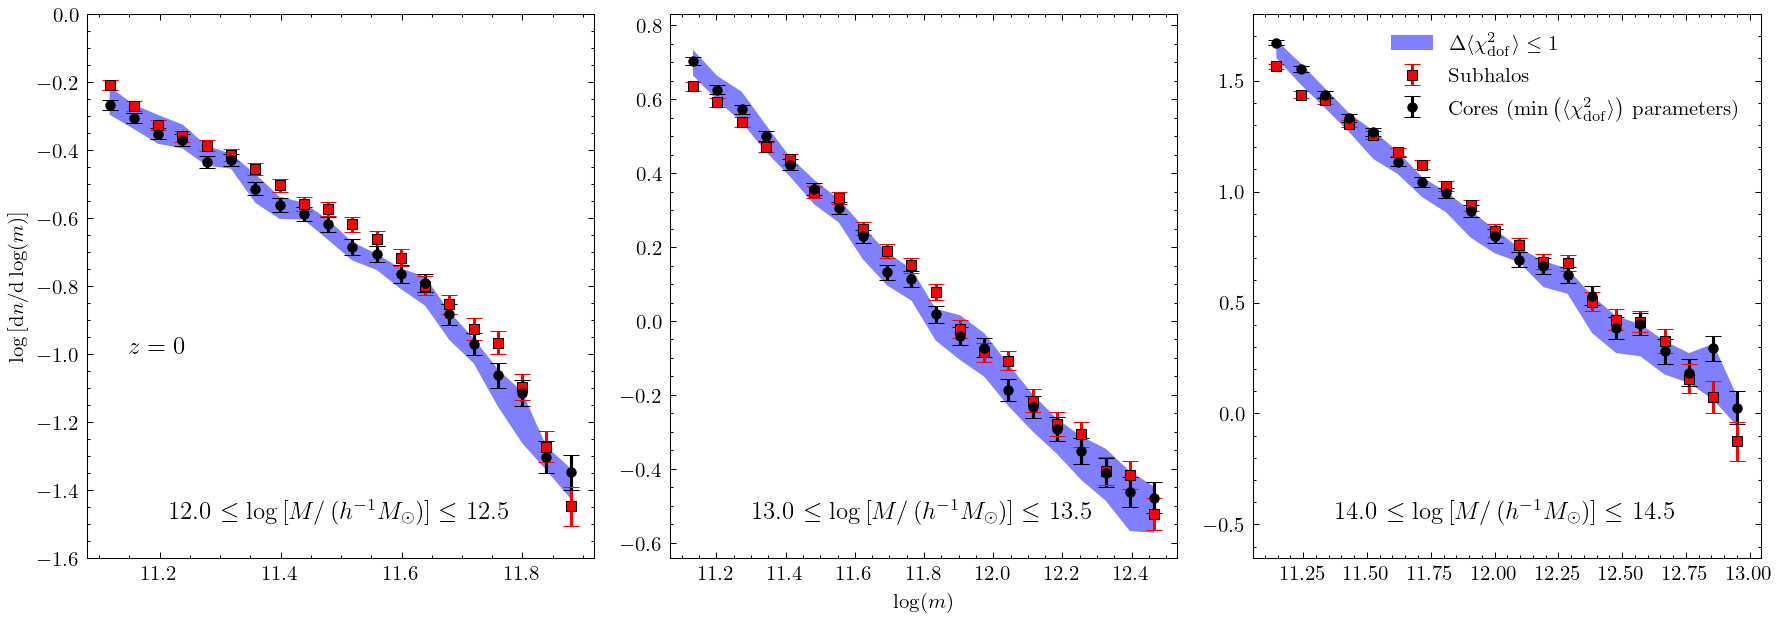

In [13]:
rlim = np.log10(OBJECTMASSCUT['SV'])
sigma1plots(cc_SV0, sh_SV0, centrals_mask_SV0, 'SV', 
            rdict={12:(rlim, 11.9), 13:(rlim, 12.5), 14:(rlim, 13.0)}, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5}, 
            ReducedChi2dict=ReducedChi2dict_SVavg_mplot, 
            mlim=OBJECTMASSCUT['SV'], mplot=True, avgchi2=True, zlabel='$z=0$', fixedAxis=True, outfile=None)#'Paper2Figs/1sigma_z0_SVavg_mplot.pdf')

SV nH_sh 34592
SV number of subhalos in bin 9485
len(Avals) 22
Abf:  1.0 zetabf:  0.02
SV nH cores 34592
xlim:  (11.07903847694397, 11.918065214157105) 
ylim:  (-1.6, 0.0)

SV nH_sh 2418
SV number of subhalos in bin 6816
len(Avals) 19
Abf:  1.3 zetabf:  0.1
SV nH cores 2418
xlim:  (11.065538835525512, 12.531565237045289) 
ylim:  (-0.64, 0.83)

SV nH_sh 36
SV number of subhalos in bin 707
len(Avals) 20


/home/isultan/projects/itk/itk.py:158: RuntimeWarning: invalid value encountered in true_divide
  ebars_log = 1./np.log(10) * np.sqrt(cnts)/cnts
/home/isultan/projects/itk/itk.py:174: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)


Abf:  0.9 zetabf:  0.001
SV nH cores 36
xlim:  (11.05428867340088, 13.042814445495605) 
ylim:  (-0.65, 1.8)



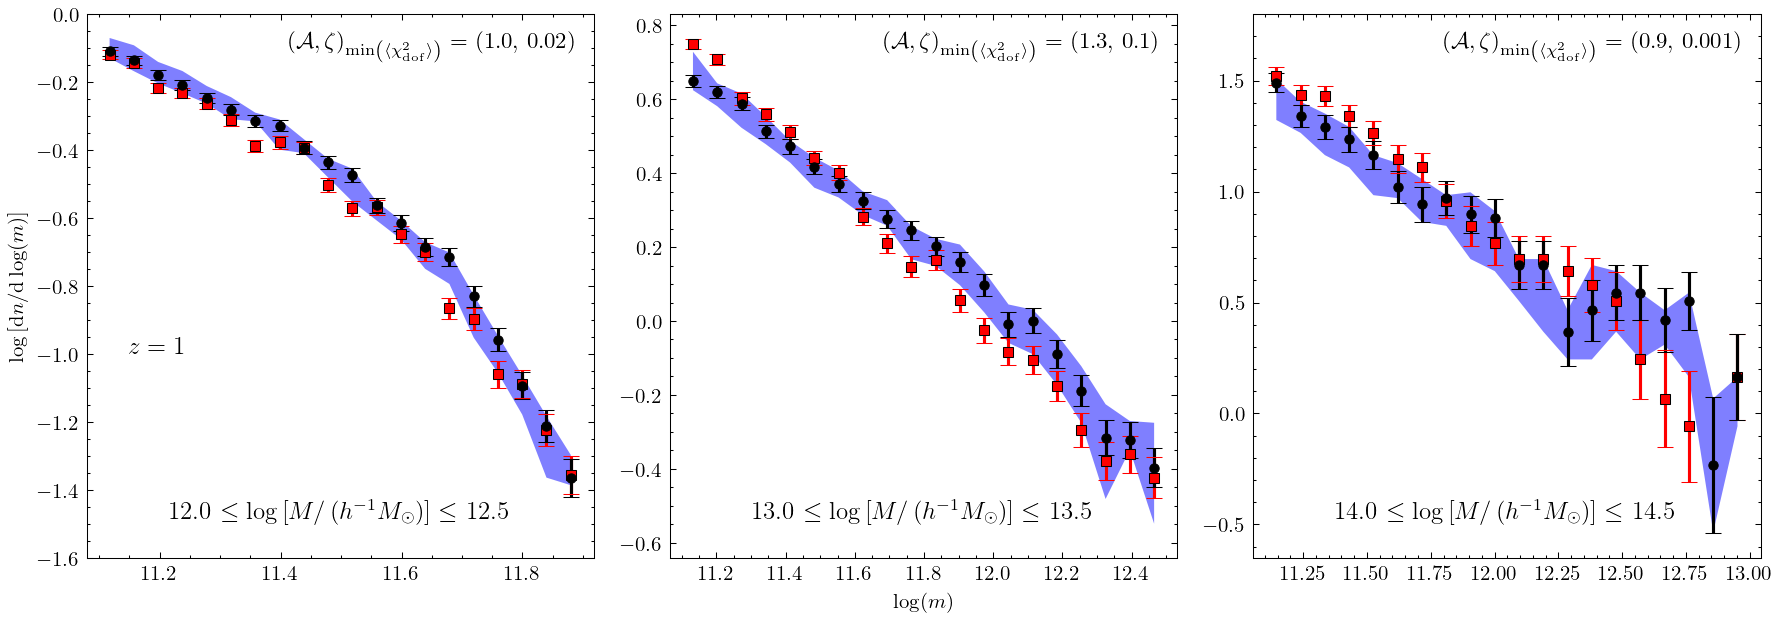

In [14]:
# z=1 1sigma
rlim = np.log10(OBJECTMASSCUT['SV'])
sigma1plots(cc_SV1, sh_SV1, centrals_mask_SV1, 'SV', 
            rdict={12:(rlim, 11.9), 13:(rlim, 12.5), 14:(rlim, 13.0)}, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5}, 
            ReducedChi2dict=ReducedChi2dict_SVavg_mplot, 
            mlim=OBJECTMASSCUT['SV'], mplot=True, avgchi2=True, legendFlag=False, zlabel='$z=1$', fixedAxis=True, bfparamslabelFlag=True, outfile=None)#'Paper2Figs/1sigma_z1_SVavg_mplot.pdf')

SV nH_sh 40628
SV number of subhalos in bin 8964
SV nH cores 40628
SV nH cores 40628
SV nH_sh 4797
SV number of subhalos in bin 11395
SV nH cores 4797
SV nH cores 4797
SV nH_sh 337
SV number of subhalos in bin 6886
SV nH cores 337
SV nH cores 337
SV nH_sh 61500
SV number of subhalos in bin 51612
SV nH cores 61500
SV nH cores 61500


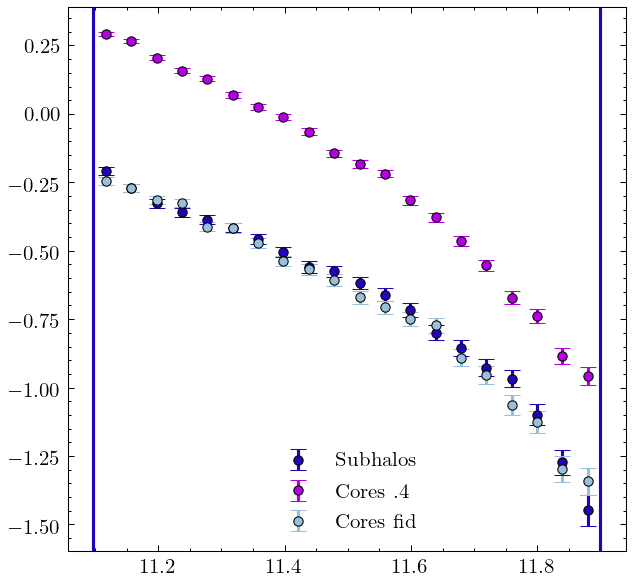

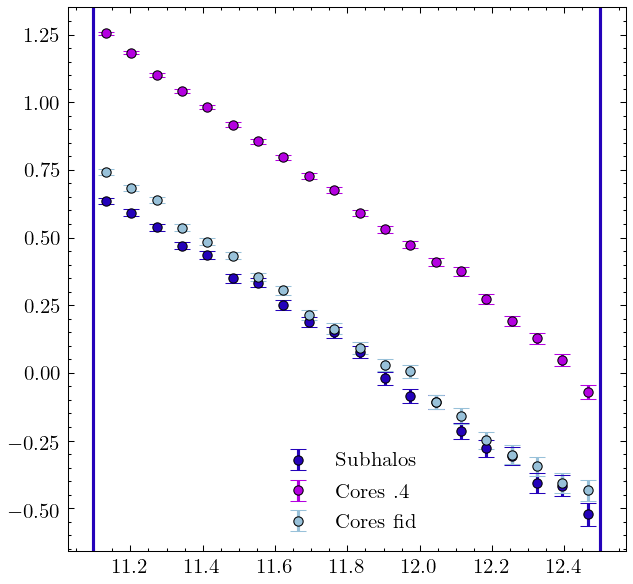

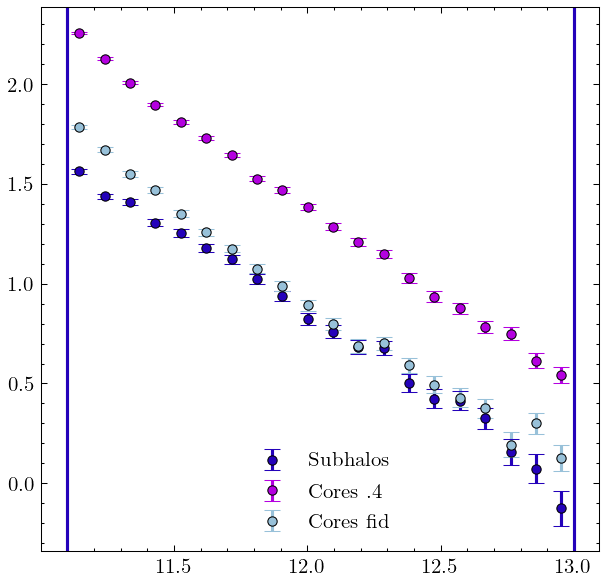

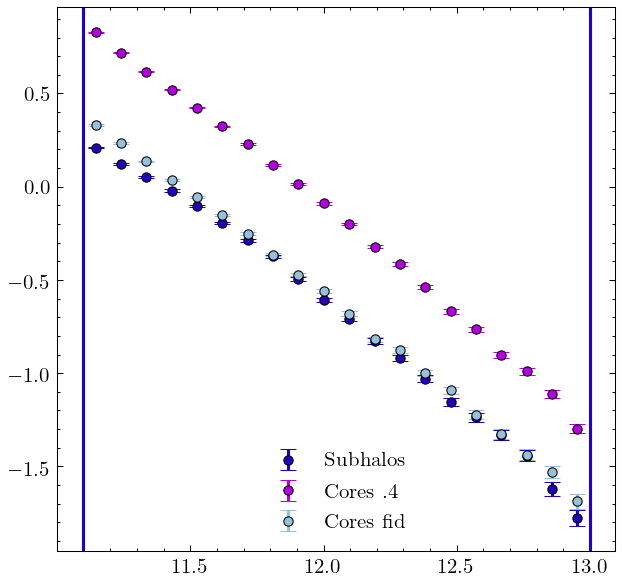

In [102]:
#testing: determine range
cc, centrals_mask, sh = cc_SV0, centrals_mask_SV0, sh_SV0
# cc, centrals_mask, sh = cc_SV1, centrals_mask_SV1, sh_SV1

bins = 20
alpha = .8
label = 'SV'
mplot = True

mlim = OBJECTMASSCUT[label]

rlim = np.log10(OBJECTMASSCUT[label])
rdict = {12:(rlim, 11.9), 13:(rlim, 12.5), 14:(rlim, 13.0), 'ALL':(rlim, 13.0)}
M1dict = {12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}
M2dict = {12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc['M'].max()}

for i in [12, 13, 14, 'ALL']:
    plt.figure()
    r, M1, M2 = rdict[i], M1dict[i], M2dict[i]
    plt.axvline(r[0])
    plt.axvline(r[1])
    #r=None

    x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh = subhalo_plot(sh, M1, M2, label, bins, r, mlim=mlim, mplot=mplot)
    errorbar(plt, x_sh, y_sh, yerr=yerr_log_sh, label='Subhalos', marker='o')

    x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=mlim, A=0.4, zeta=0.3, mplot=mplot)
    errorbar(plt, x, y, yerr=yerr_log, label='Cores .4', marker='o')

    x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=mlim, A=AFID, zeta=ZETAFID, mplot=mplot)
    errorbar(plt, x, y, yerr=yerr_log, label='Cores fid', marker='o')

    # print plt.xlim()
    plt.legend()

## HM fitting (m/M)

HM 33020
HM 33020

HM 2368
HM 2368

HM 21
HM 21

HM 45394
HM 45394

A 1.7 zeta 0.275
12.0 12.5
6.348674000180215 4807.801478138268

A 2.2 zeta 0.3
13.0 13.5
6.8980966639947505 1823.6431314299984

A 0.9 zeta 0.07
14.0 14.5
0.9877083910909339 172.27106545579355

A 1.9 zeta 0.3
12.0 14.577735
12.882110053305972 8274.739556584587



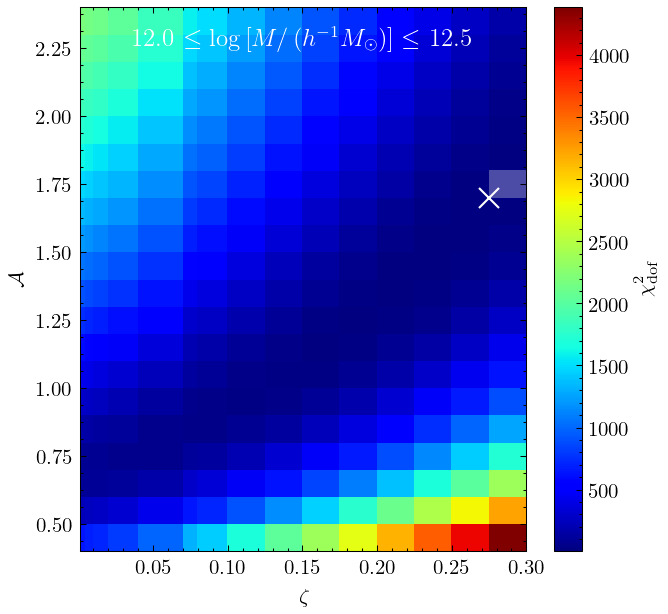

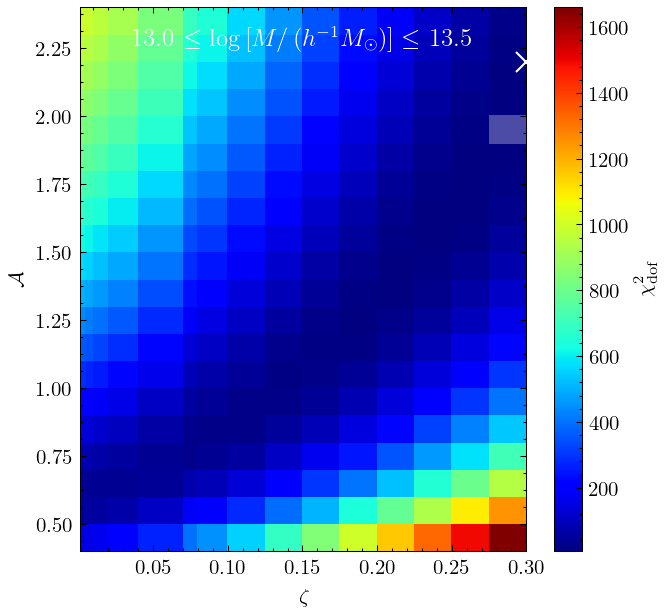

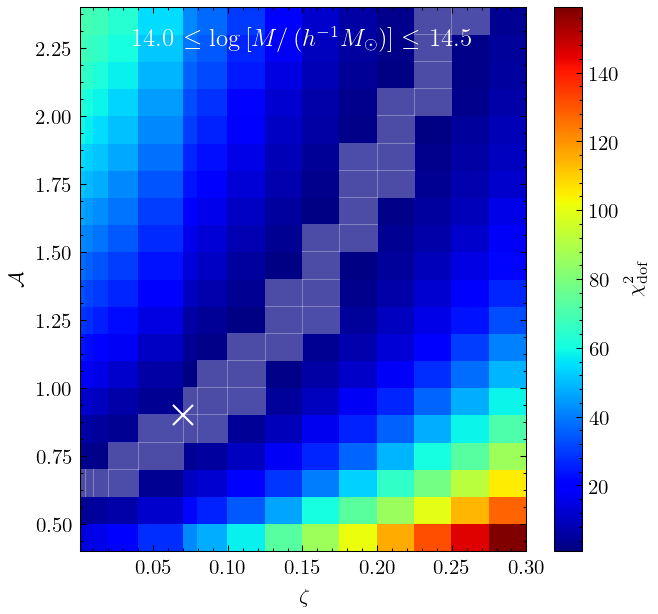

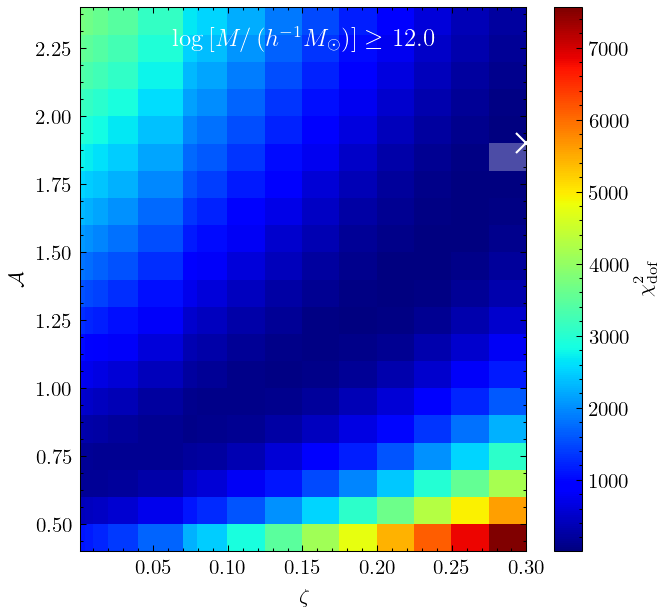

In [24]:
ReducedChi2dict_HM1 = ReducedChi2dict_gen(cc_HM1, sh_HM1, centrals_mask_HM1, 'HM', 
                                      {12:(-2.2,-0.6), 13:(-3.0,-0.6), 14:(-4.0,-0.6), 'ALL':(-2.3,-0.6)}, #z=0 HM fitting 
                                      {12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
                                      {12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM1['M'].max()}, mlim=OBJECTMASSCUT['HM'])
pcolorplots(ReducedChi2dict_HM1,
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM1['M'].max()})

HM 39505
HM 39505

HM 4738
HM 4738

HM 348
HM 348

HM 59759
HM 59759

A 0.8 zeta 0.01
12.0 12.5
2.1918013196558483 6749.011395611575

A 0.8 zeta 0.01
13.0 13.5
5.008949183657138 4581.563918089906

A 0.8 zeta 0.001
14.0 14.5
8.897495929082156 3529.1384373394767

A 0.8 zeta 0.01
12.0 15.193961
3.8880778082855283 12830.820356818338



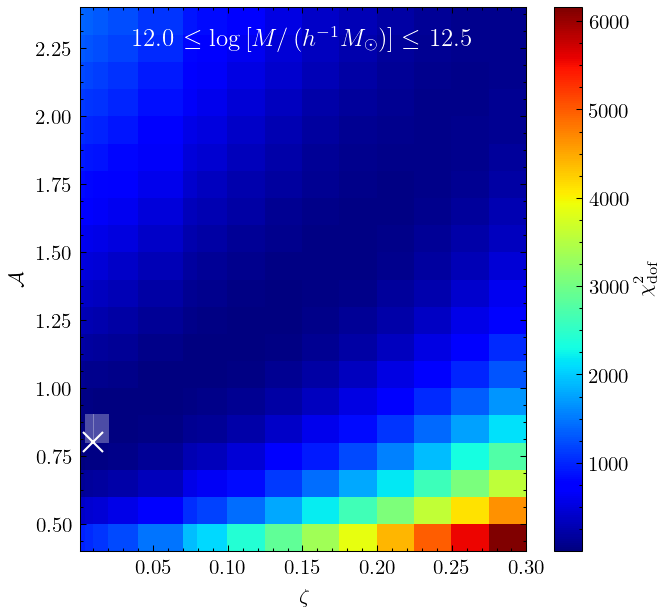

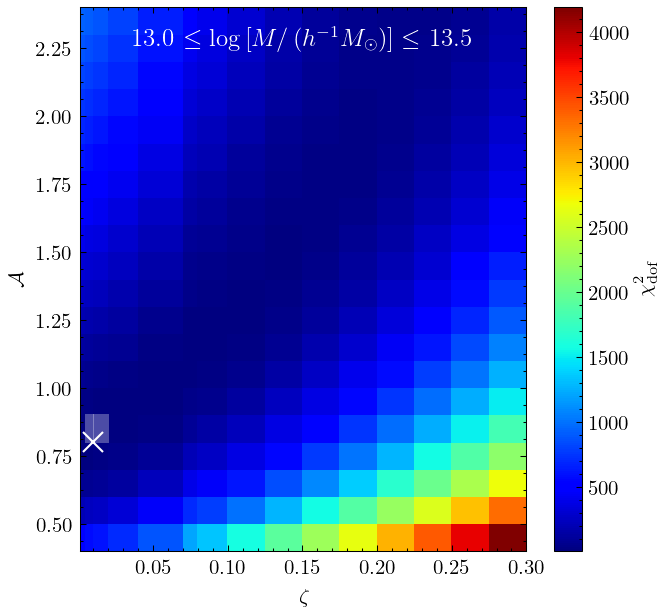

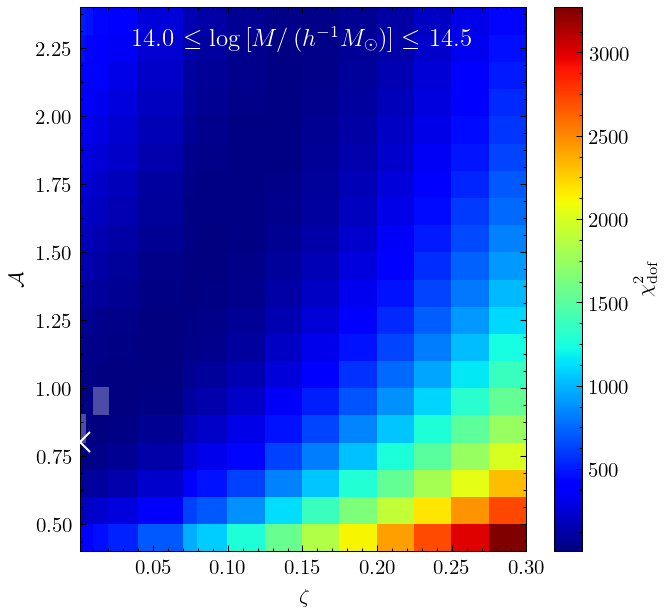

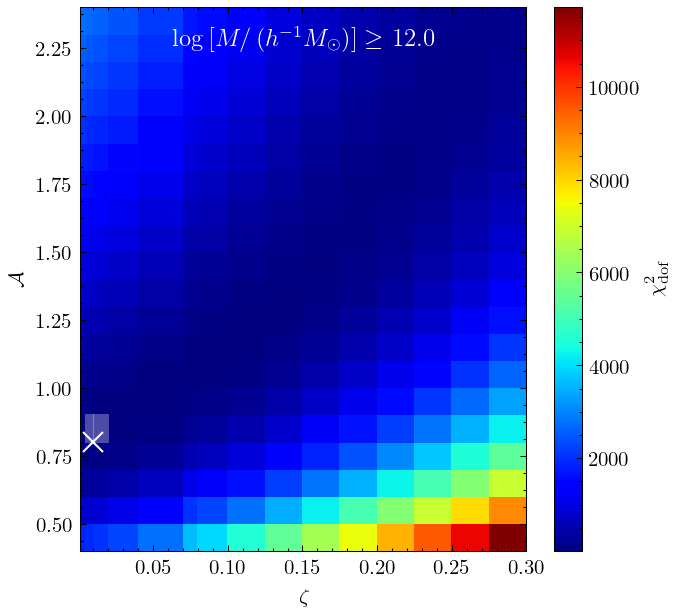

In [21]:
ReducedChi2dict_HM0 = ReducedChi2dict_gen(cc_HM0, sh_HM0, centrals_mask_HM0, 'HM', 
                                      {12:(-2.2,-0.6), 13:(-3.0,-0.6), 14:(-4.0,-0.6), 'ALL':(-2.3,-0.6)}, #z=0 HM fitting 
                                      {12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
                                      {12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM0['M'].max()}, mlim=OBJECTMASSCUT['HM'])
pcolorplots(ReducedChi2dict_HM0, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM0['M'].max()})

A 1.0 zeta 0.1
12.0 12.5
46.55424115524989 5778.406436874921

A 0.7 zeta 0.01
13.0 13.5
46.4591652108617 3202.603524759952

A 0.8 zeta 0.001
14.0 14.5
7.963353079279413 1850.7047513976352

A 0.9 zeta 0.07
12.0 15.193961
94.26709089253171 10552.779956701463



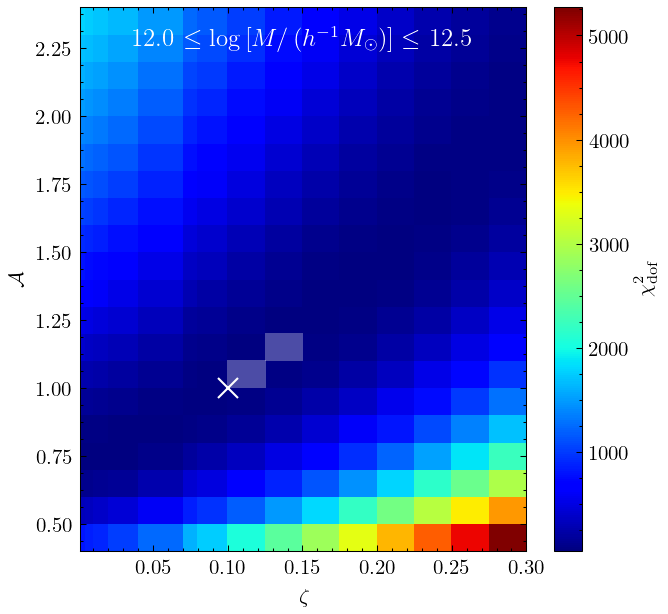

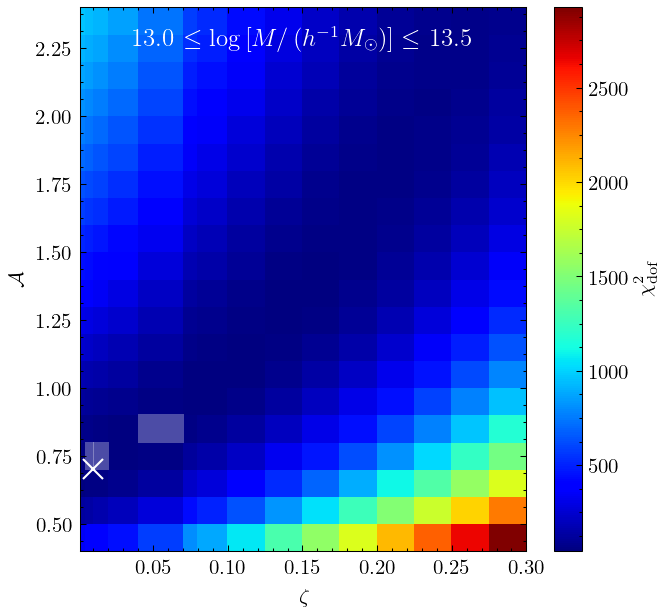

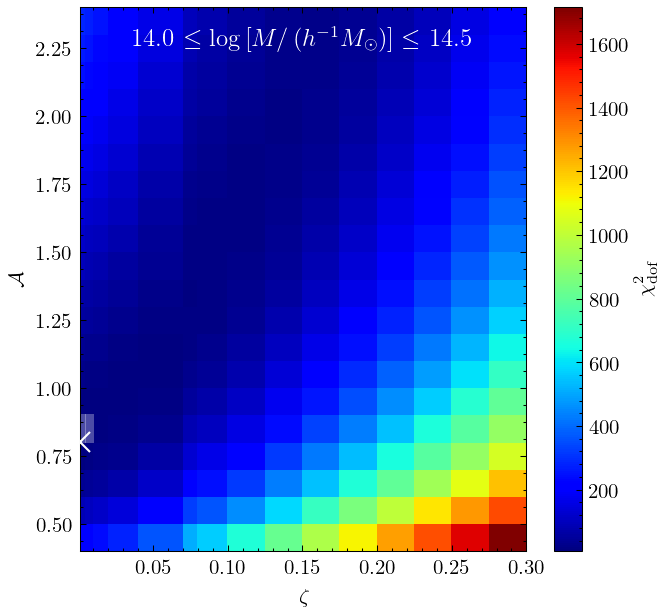

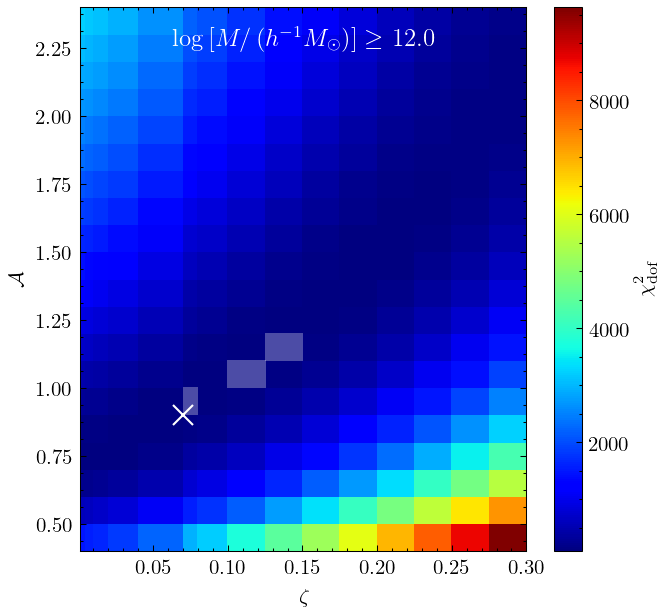

In [26]:
ReducedChi2dict_HMavg = {k:((ReducedChi2dict_HM0[k]+ReducedChi2dict_HM1[k])/2.0) for k in ReducedChi2dict_HM0.keys()}
pcolorplots(ReducedChi2dict_HMavg, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM0['M'].max()})

HM 45394
HM 45394
HM 45394
HM 45394
(-2.3382499277591706, -0.5617500483989716)


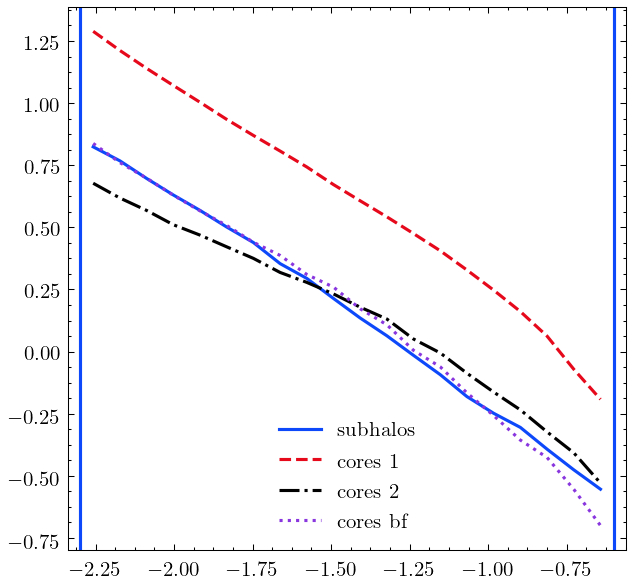

In [75]:
#testing: determine range
M1, M2 = 10**12.0,cc['M'].max()#10**14.5
r=rdict['ALL']
bins = 20
label = 'HM'

x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh, bin_mask_sh_100 = subhalo_plot(sh, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], returnMask=True)
plt.plot(x_sh, y_sh, label='subhalos')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=0.4, zeta=0.3)
plt.plot(x, y, label='cores 1')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=0.8, zeta=0.01)
plt.plot(x, y, 'k', label='cores 2')

x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=OBJECTMASSCUT[label], A=1.9, zeta=0.3)
plt.plot(x, y, label='cores bf')

plt.legend()
print plt.xlim()
plt.axvline(-2.3)
plt.axvline(-0.6)

## mplot dlog HM fitting

In [ ]:
paramscan_resolution_tests(cc_HM0_Mdvir, sh_HM0, centrals_mask_HM0_Mdvir, cc_SV0, sh_SV0, centrals_mask_SV0, mplot=True, outfile='/home/isultan/projects/halomassloss/core_catalog_mevolved/Paper2Figs/paramexploration_mplot/z0_HM_Mdvir/z0')

In [ ]:
paramscan_resolution_tests(cc_HM1_Mdvir, sh_HM1, centrals_mask_HM1_Mdvir, cc_SV1, sh_SV1, centrals_mask_SV1, mplot=True, outfile='/home/isultan/projects/halomassloss/core_catalog_mevolved/Paper2Figs/paramexploration_mplot/z1_HM_Mdvir/z1')

In [ ]:
paramscan_resolution_tests(cc_HM1_ifm, sh_HM1, centrals_mask_HM1_ifm, cc_SV1, sh_SV1, centrals_mask_SV1, mplot=True, outfile='/home/isultan/projects/halomassloss/core_catalog_mevolved/Paper2Figs/paramexploration_mplot/z1_HM_ifm/z1')

In [ ]:
paramscan_resolution_tests(cc_HM0_ifm, sh_HM0, centrals_mask_HM0_ifm, cc_SV0, sh_SV0, centrals_mask_SV0, mplot=True, outfile='/home/isultan/projects/halomassloss/core_catalog_mevolved/Paper2Figs/paramexploration_mplot/z0_HM_ifm/z0')

HM 39505
HM 39505

HM 4738
HM 4738

HM 348
HM 348

HM 59759
HM 59759

A 0.9 zeta 0.01
12.0 12.5
1.7162617582971131 7393.745612251131

A 1.1 zeta 0.01
13.0 13.5
5.856133804298749 8967.202943255701

A 1.7 zeta 0.04
14.0 14.5
14.017197523134046 7049.702520104921

A 1.1 zeta 0.01
12.0 15.193961
39.03852257450634 43115.12855310246



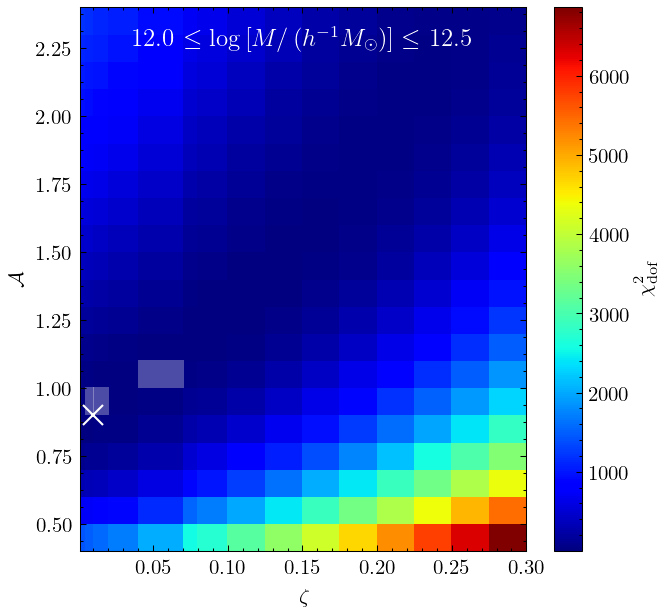

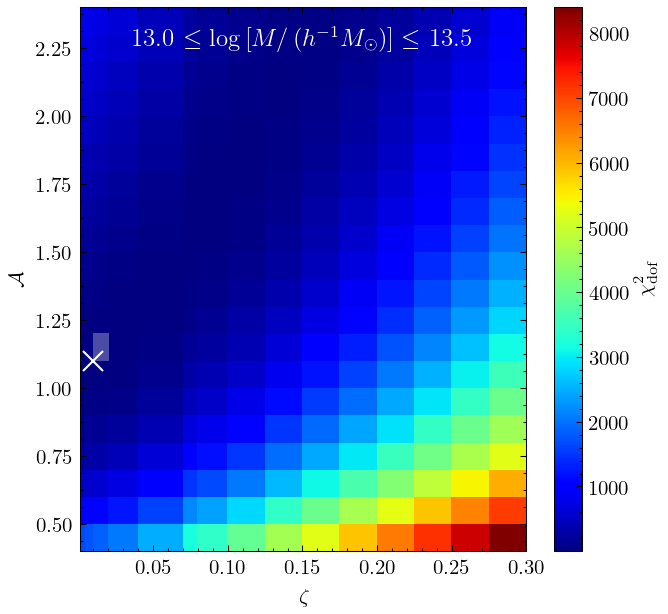

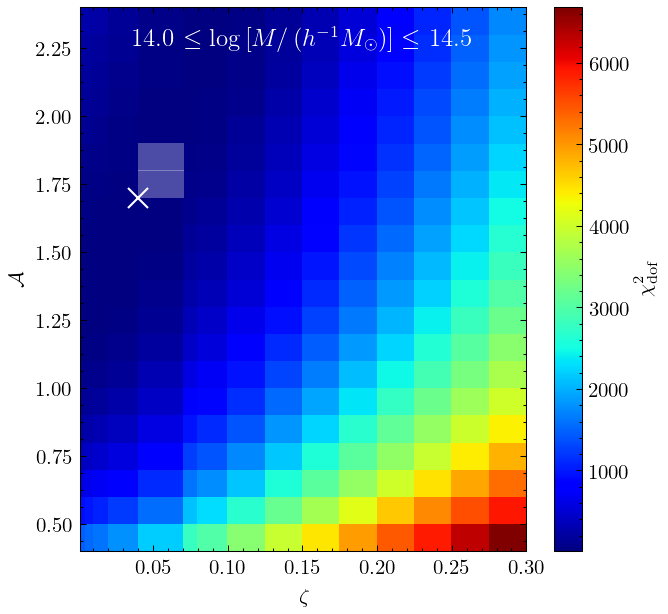

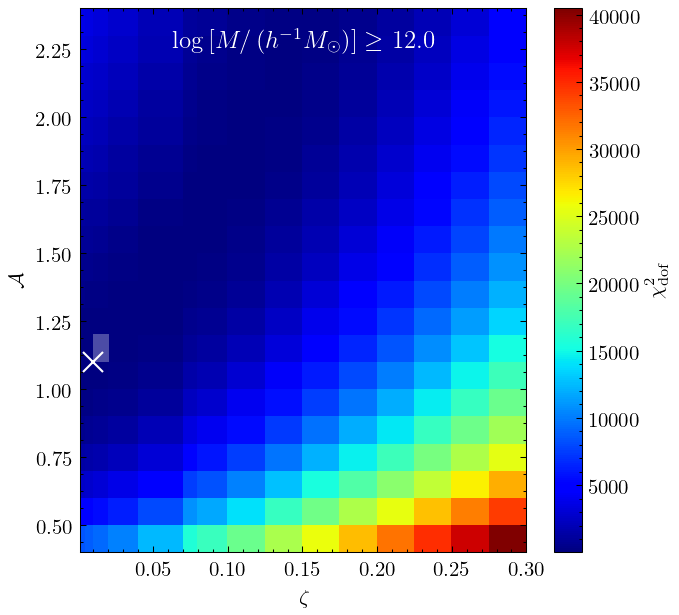

In [25]:
ReducedChi2dict_HM0_ifm_mplot_dlog = ReducedChi2dict_gen(cc_HM0_ifm, sh_HM0, centrals_mask_HM0_ifm, 'HM', 
                                          {12:(10.0, 11.4), 13:(10.0, 11.8), 14:(10.0, 11.8), 'ALL':(10.0, 11.8)}, 
                                          {12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
                                          {12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM0_ifm['M'].max()}, mlim=0, mplot=True, dlog=True)
pcolorplots(ReducedChi2dict_HM0_ifm_mplot_dlog, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM0_ifm['M'].max()})

HM 33020
HM 33020

HM 2368
HM 2368

HM 21
HM 21

HM 45394
HM 45394

A 2.3 zeta 0.3
12.0 12.5
5.902009788928217 5734.152858086538

A 2.4 zeta 0.25
13.0 13.5
7.129274594305059 3698.8985195029836

A 1.8 zeta 0.125
14.0 14.5
1.3706342945544496 357.18830459331986

A 2.4 zeta 0.275
12.0 14.577735
16.01572777366897 16945.619445395205



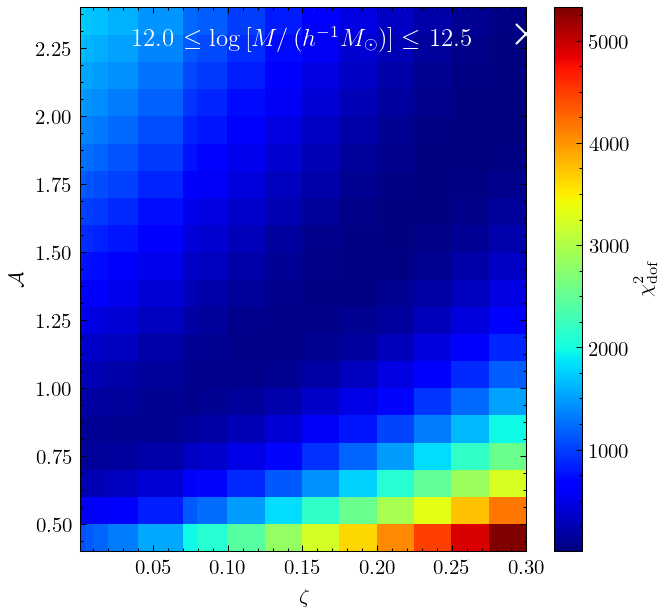

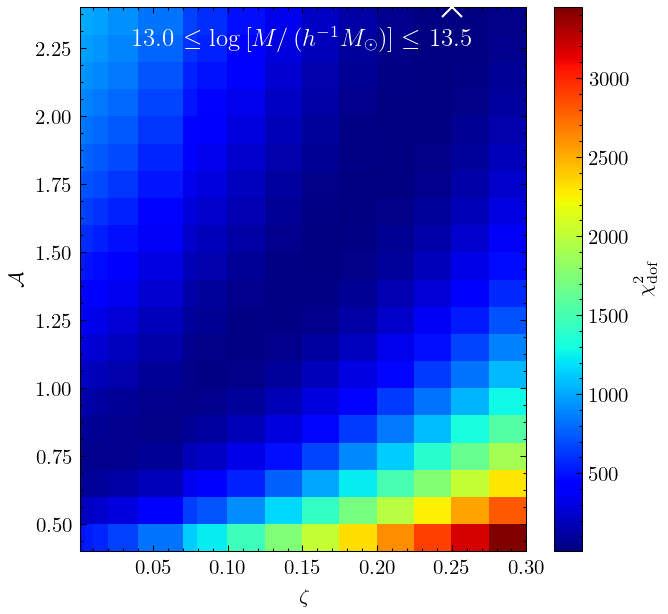

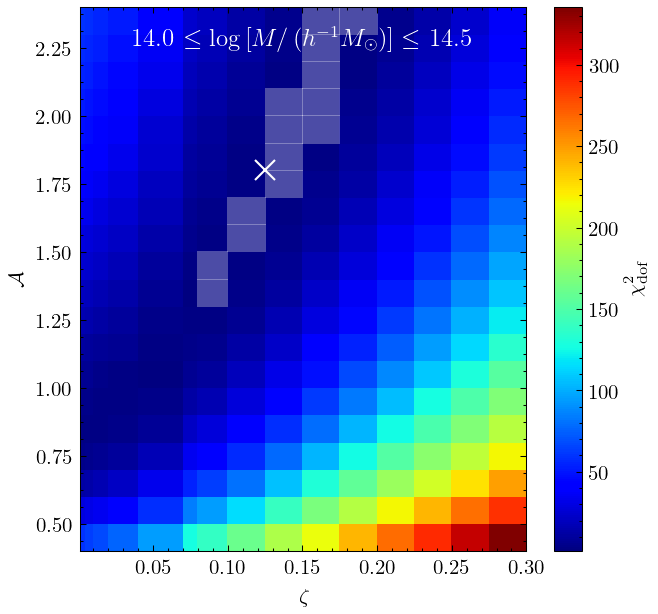

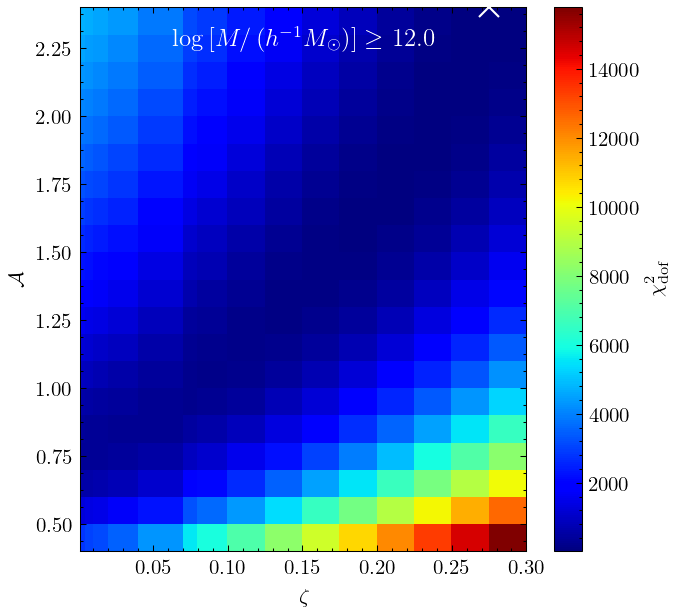

In [21]:
ReducedChi2dict_HM1_ifm_mplot_dlog = ReducedChi2dict_gen(cc_HM1_ifm, sh_HM1, centrals_mask_HM1_ifm, 'HM', 
                                          {12:(10.0, 11.4), 13:(10.0, 11.8), 14:(10.0, 11.8), 'ALL':(10.0, 11.8)}, 
                                          {12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
                                          {12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM1_ifm['M'].max()}, mlim=0, mplot=True, dlog=True)
pcolorplots(ReducedChi2dict_HM1_ifm_mplot_dlog, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM1_ifm['M'].max()})

HM 33020
HM 33020

HM 2368
HM 2368

HM 21
HM 21

HM 45394
HM 45394

A 2.2 zeta 0.3
12.0 12.5
3.45091470391891 5199.674869757538

A 1.0 zeta 0.125
13.0 13.5
10.774506540732865 3079.2183006631913

A 0.6 zeta 0.001
14.0 14.5
1.4386145477419257 295.0965264018447

A 1.7 zeta 0.225
12.0 14.577735
15.601899565163851 14599.612193677882



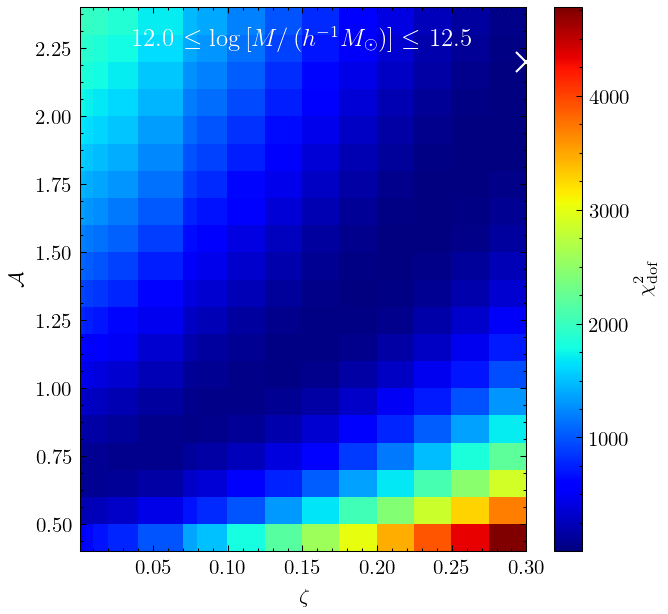

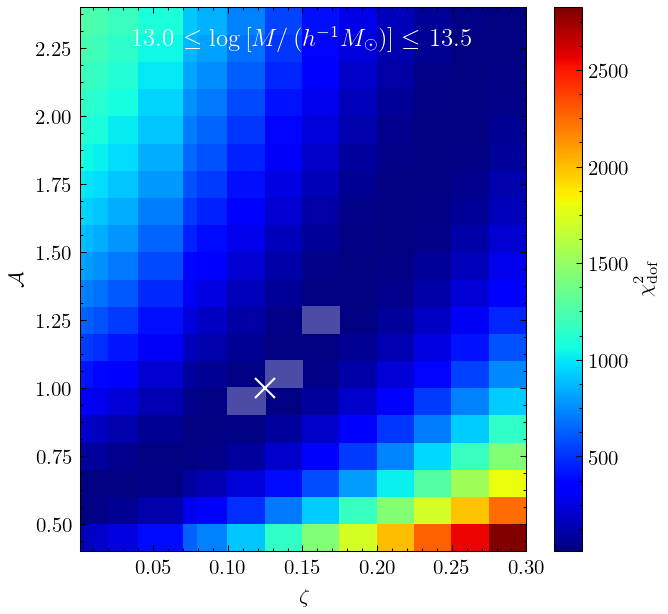

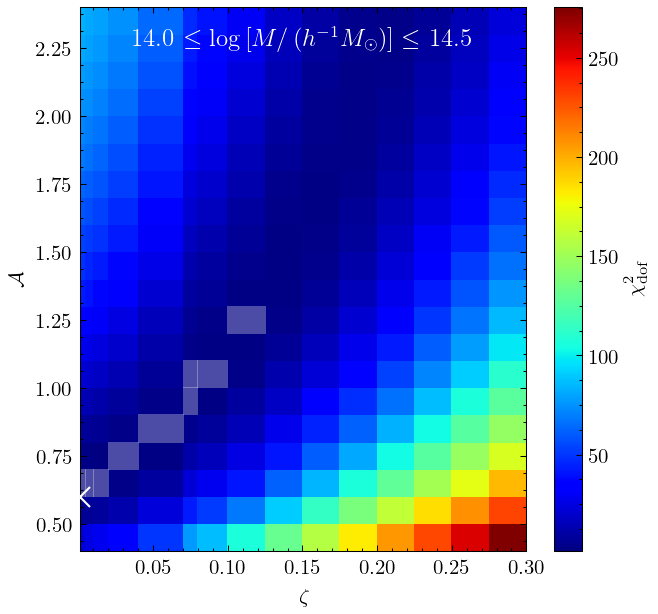

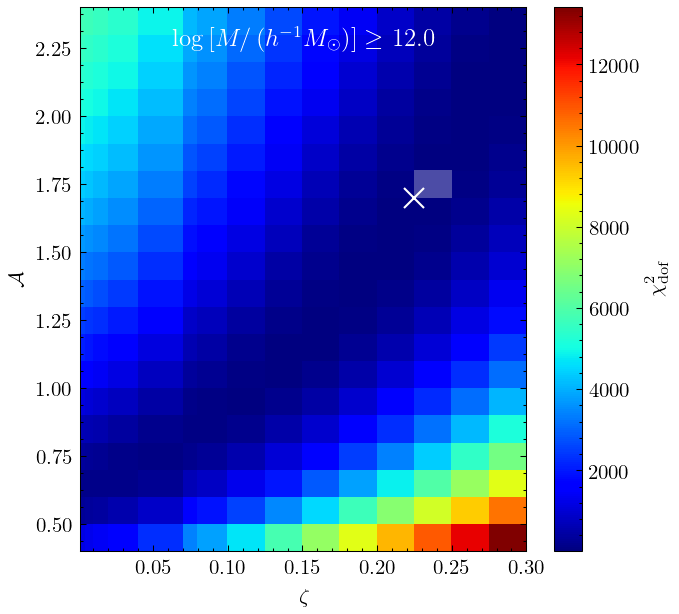

In [14]:
ReducedChi2dict_HM1_Mdvir_mplot_dlog = ReducedChi2dict_gen(cc_HM1_Mdvir, sh_HM1, centrals_mask_HM1_Mdvir, 'HM', 
                                          {12:(10.0, 11.4), 13:(10.0, 11.8), 14:(10.0, 11.8), 'ALL':(10.0, 11.8)}, 
                                          {12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
                                          {12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM1_Mdvir['M'].max()}, mlim=0, mplot=True, dlog=True)
pcolorplots(ReducedChi2dict_HM1_Mdvir_mplot_dlog, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM1_Mdvir['M'].max()})

HM 39505
HM 39505

HM 4738
HM 4738

HM 348
HM 348

HM 59759
HM 59759

A 0.8 zeta 0.01
12.0 12.5
2.1996521530142705 6783.681718253217

A 0.8 zeta 0.001
13.0 13.5
13.360042262024818 7507.863396495867

A 0.9 zeta 0.001
14.0 14.5
36.921389968799105 5784.904528080009

A 0.8 zeta 0.001
12.0 15.193961
89.43270457412632 36668.7634844299



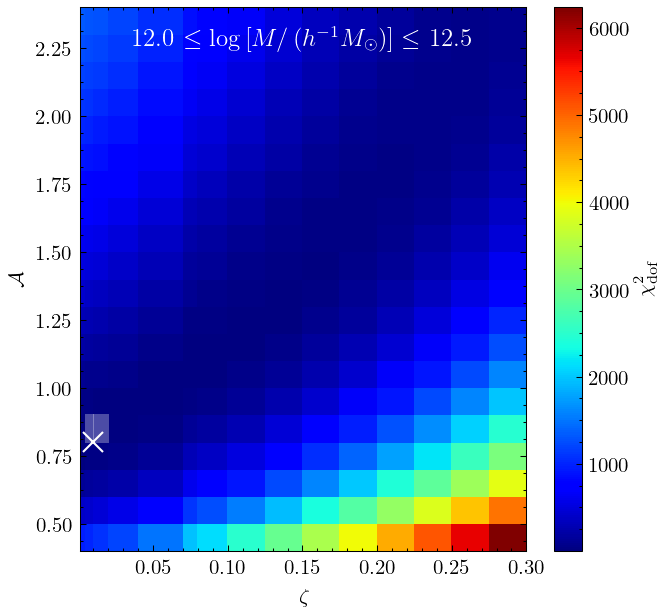

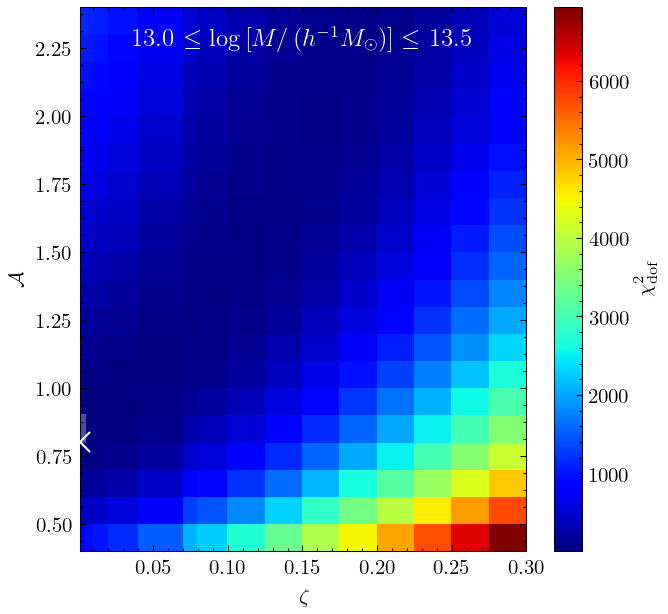

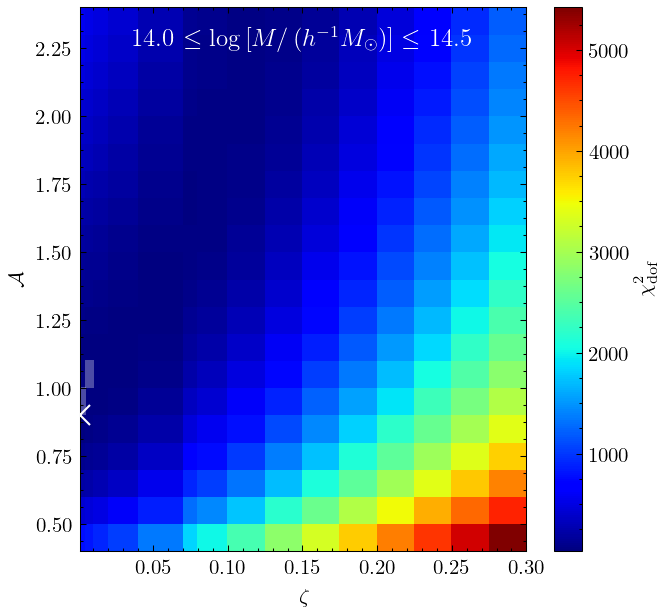

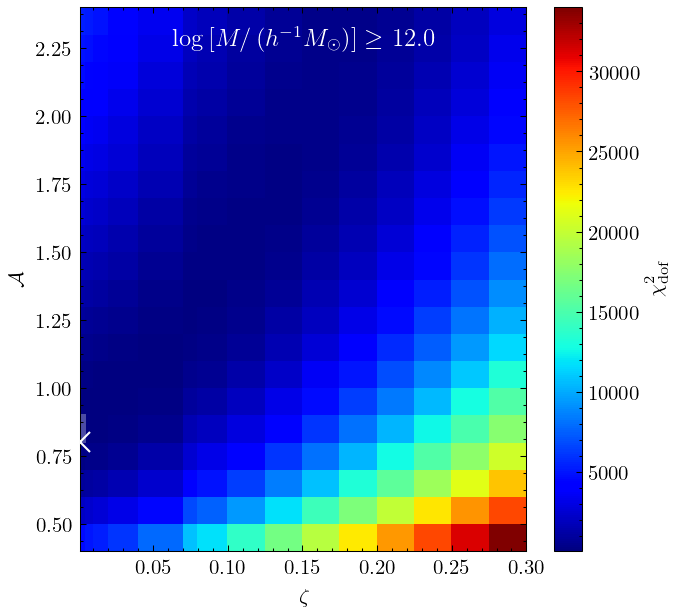

In [13]:
ReducedChi2dict_HM0_Mdvir_mplot_dlog = ReducedChi2dict_gen(cc_HM0_Mdvir, sh_HM0, centrals_mask_HM0_Mdvir, 'HM', 
                                          {12:(10.0, 11.4), 13:(10.0, 11.8), 14:(10.0, 11.8), 'ALL':(10.0, 11.8)}, 
                                          {12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
                                          {12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM0_Mdvir['M'].max()}, mlim=0, mplot=True, dlog=True)
pcolorplots(ReducedChi2dict_HM0_Mdvir_mplot_dlog, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM0_Mdvir['M'].max()})

HM 39505
HM 39505

HM 4738
HM 4738

HM 348
HM 348

HM 59759
HM 59759

A 0.8 zeta 0.01
12.0 12.5
2.153725764962692 6206.064893011735

A 0.8 zeta 0.001
13.0 13.5
13.351201719933195 6976.104657148952

A 0.9 zeta 0.001
14.0 14.5
36.89245095296558 5473.433101029074

A 0.8 zeta 0.001
12.0 15.193961
89.36689074425097 34130.26632422394



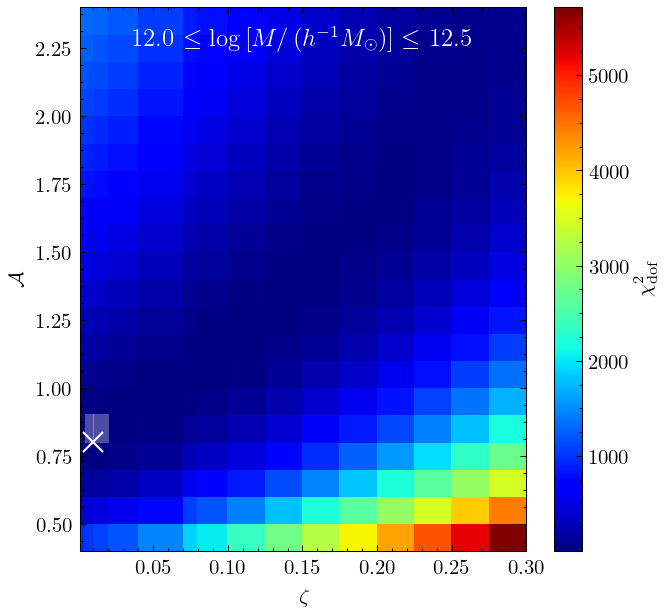

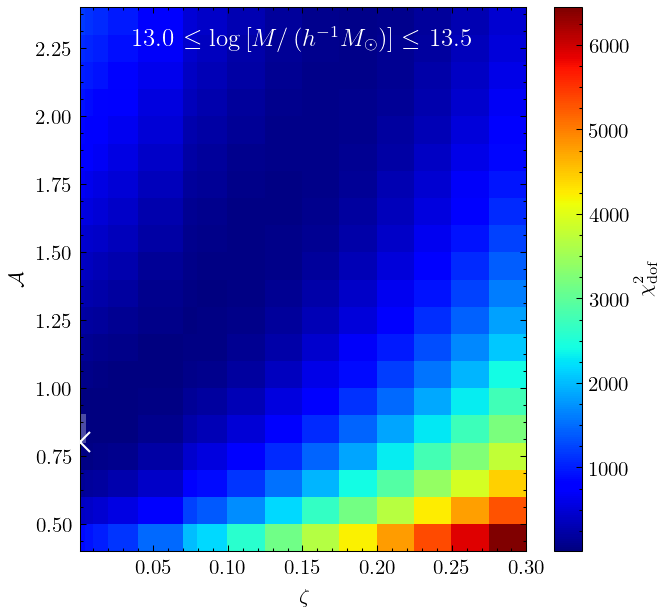

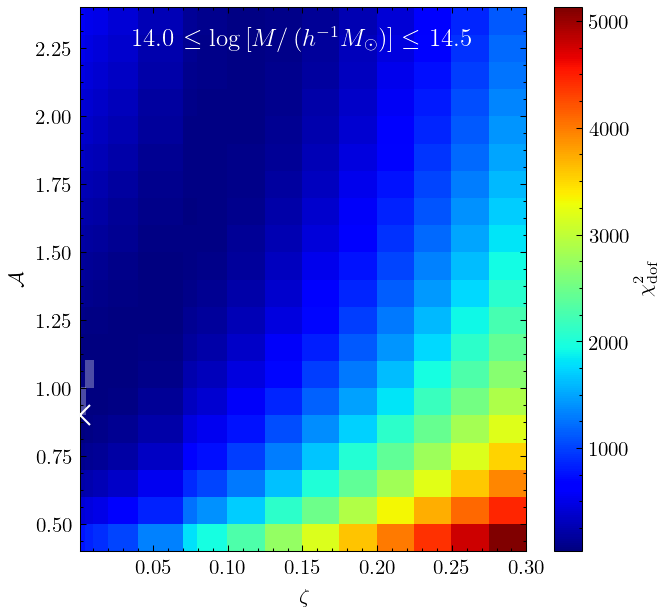

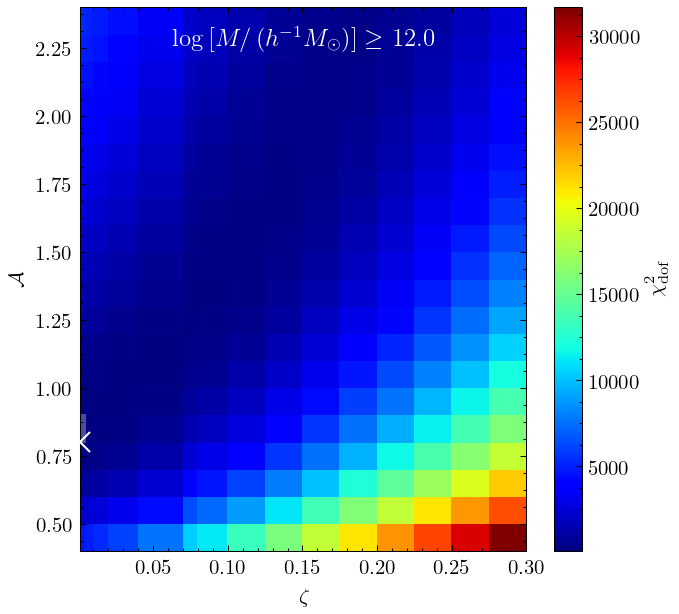

In [10]:
ReducedChi2dict_HM0_mplot_dlog = ReducedChi2dict_gen(cc_HM0, sh_HM0, centrals_mask_HM0, 'HM', 
                                          {12:(10.0, 11.4), 13:(10.0, 11.8), 14:(10.0, 11.8), 'ALL':(10.0, 11.8)}, 
                                          {12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
                                          {12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM0['M'].max()}, mlim=0, mplot=True, dlog=True)
pcolorplots(ReducedChi2dict_HM0_mplot_dlog, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM0['M'].max()})

HM 33020
HM 33020

HM 2368
HM 2368

HM 21
HM 21

HM 45394
HM 45394

A 1.9 zeta 0.3
12.0 12.5
3.4653480635823346 4490.073528303116

A 1.1 zeta 0.15
13.0 13.5
10.296661040083178 2696.942661229412

A 0.6 zeta 0.001
14.0 14.5
1.4848460941775288 266.26978990686933

A 1.7 zeta 0.25
12.0 14.577735
16.86298170168108 12705.712561657232



/home/isultan/.local/lib/python2.7/site-packages/matplotlib/colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/isultan/.local/lib/python2.7/site-packages/numpy/ma/core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)
/home/isultan/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


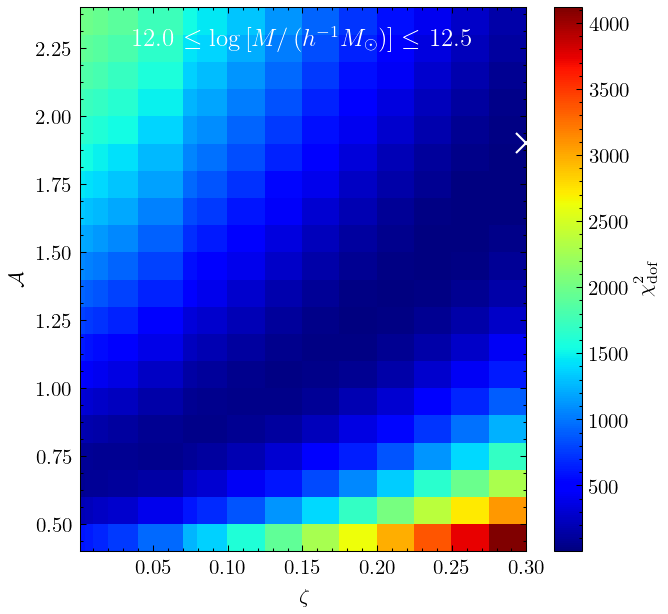

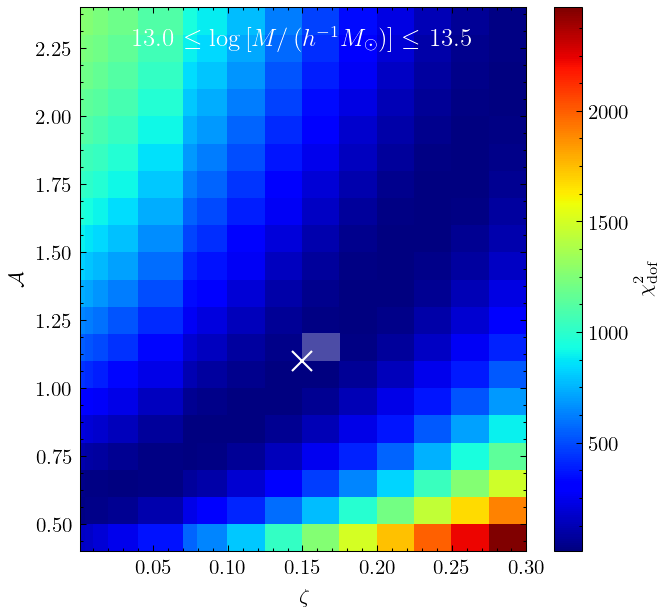

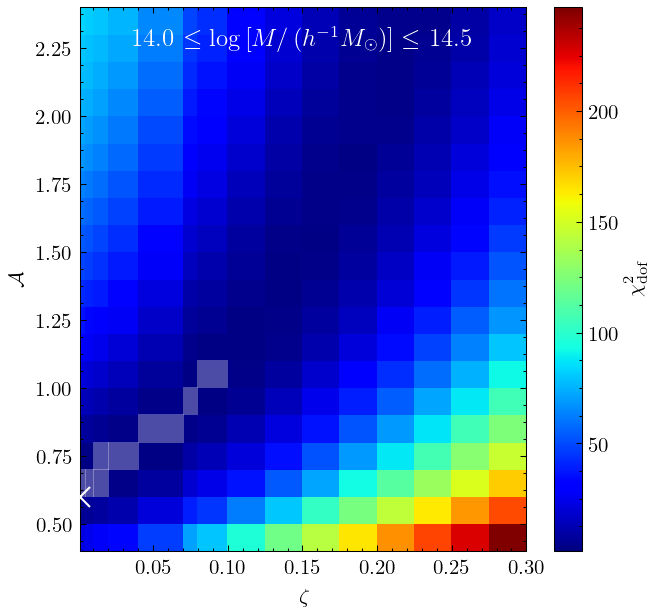

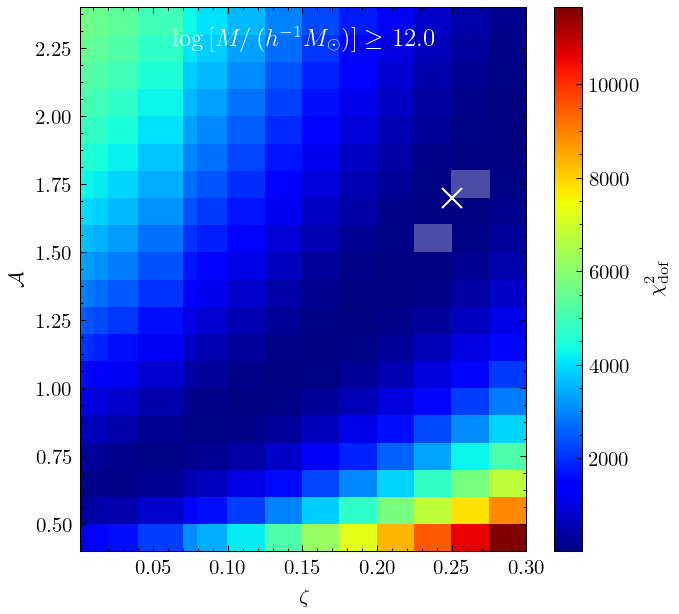

In [9]:
ReducedChi2dict_HM1_mplot_dlog = ReducedChi2dict_gen(cc_HM1, sh_HM1, centrals_mask_HM1, 'HM', 
                                          {12:(10.0, 11.4), 13:(10.0, 11.8), 14:(10.0, 11.8), 'ALL':(10.0, 11.8)}, 
                                          {12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
                                          {12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM1['M'].max()}, mlim=0, mplot=True, dlog=True)
pcolorplots(ReducedChi2dict_HM1_mplot_dlog, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc_HM1['M'].max()})

HM 39505
HM 39505
HM 39505
HM 39505

HM 4738
HM 4738
HM 4738
HM 4738

HM 348
HM 348
HM 348
HM 348



Text(0,0.5,'$\\log \\left[ \\mathrm{d}n/\\mathrm{d} \\log(m/M) \\right]$')

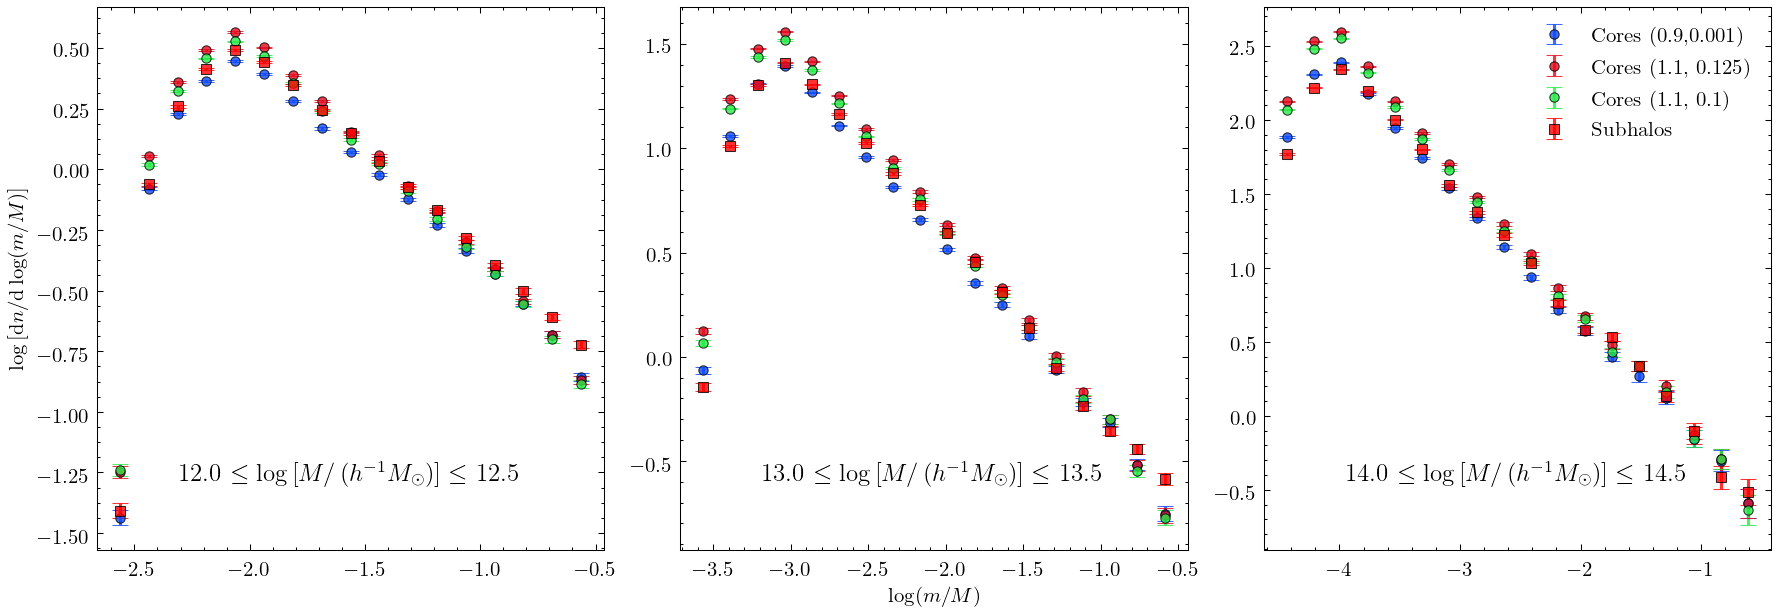

In [99]:
bins = 20
alpha = .8
label = 'HM'

cc = cc_HM0
sh = sh_HM0
centrals_mask = centrals_mask_HM0

M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}
M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc['M'].max()}
# rdict = { 
#     12:(-1.3,-0.4), 
#     13:(-1.9,-0.4), 
#     14:(-2.8,-0.6)
# }

rdict = { 
    12:(-3.0,-0.5), 
    13:(-4.0,-0.5), 
    14:(-5.0,-0.5)
}

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False, sharey=False, gridspec_kw={'hspace': 0, 'wspace': .15}, figsize=[4.8*3,4.8*1], dpi=150)
for Mlabel, ax in zip( (12, 13, 14), (ax1, ax2, ax3) ):
    M1, M2 = M1dict[Mlabel], M2dict[Mlabel]
    r = rdict[Mlabel]
    
    x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh = subhalo_plot(sh, M1, M2, label, bins, r, mlim=2*OBJECTMASSCUT[label])
    
    Abf, zetabf =  0.9, 0.001
    x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=2*OBJECTMASSCUT[label], A=Abf, zeta=zetabf, verbose=True)
    errorbar(ax, x, y, yerr=yerr_log, label='Cores (0.9,0.001)', alpha=alpha )
    
    Abf, zetabf =  1.1, 0.125
    x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=2*OBJECTMASSCUT[label], A=Abf, zeta=zetabf, verbose=True)
    errorbar(ax, x, y, yerr=yerr_log, label='Cores (1.1, 0.125)', alpha=alpha )
    
    Abf, zetabf =  1.1, 0.1
    x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=2*OBJECTMASSCUT[label], A=Abf, zeta=zetabf, verbose=True)
    errorbar(ax, x, y, yerr=yerr_log, label='Cores (1.1, 0.1)', alpha=alpha )
    
    
    
    assert nH_cores==nH_sh
    
    errorbar(ax, x_sh, y_sh, yerr=yerr_log_sh, label='Subhalos', c='r', alpha=alpha, marker='s')
    
    print ''
    ax.set_title(r'{} $\le \log \left[ M / \left(h^{{-1}}M_\odot \right) \right] \le$ {}'.format(np.log10(M1), np.log10(M2)), y=0.1, x=0.5)

ax3.legend(loc=1)
ax2.set_xlabel(r'$\log(m/M)$')
ax1.set_ylabel(r'$\log \left[ \mathrm{d}n/\mathrm{d} \log(m/M) \right]$')
    
# plt.savefig('Paper2Figs/1sigma_z0.pdf')

## SV fitting (m): NEW subhalos

In [20]:
sh_vars = ['fof_halo_tag','subhalo_mean_x','subhalo_mean_y','subhalo_mean_z','subhalo_mean_vx', 'subhalo_mean_vy', 'subhalo_mean_vz', 'subhalo_count', 'subhalo_tag', 'subhalo_mass', 'fof_halo_count']

sh_SV0_new = gio_read_dict('/home/isultan/data/SHfindertests/SV/Subhalos_new/m000p-499.subhaloproperties', sh_vars)
sh_SV1_new = gio_read_dict('/home/isultan/data/SHfindertests/SV/Subhalos_new/m000p-247.subhaloproperties', sh_vars)

sh_SV0_new['M'] = sh_SV0_new['fof_halo_count']*PARTICLEMASS['SV']
sh_SV1_new['M'] = sh_SV1_new['fof_halo_count']*PARTICLEMASS['SV']

Variable not found
Variable not found
Variable not found
Variable not found
Variable not found
Variable not found


SV nH cores 40628
SV nH_sh 40628
SV number of subhalos in bin 8901

SV nH cores 4797
SV nH_sh 4797
SV number of subhalos in bin 11269

SV nH cores 337
SV nH_sh 337
SV number of subhalos in bin 6870

SV nH cores 61500
SV nH_sh 61500
SV number of subhalos in bin 51225

A 0.9 zeta 0.02
12.0 12.5
1.068285566035178 508.5799617419468

A 1.0 zeta 0.02
13.0 13.5
1.5288113721790553 939.1053462005844

A 1.1 zeta 0.01
14.0 14.5
4.991905053330057 676.2718872144527

A 1.0 zeta 0.02
12.0 15.071189
5.7547385895375545 4227.5617036366975



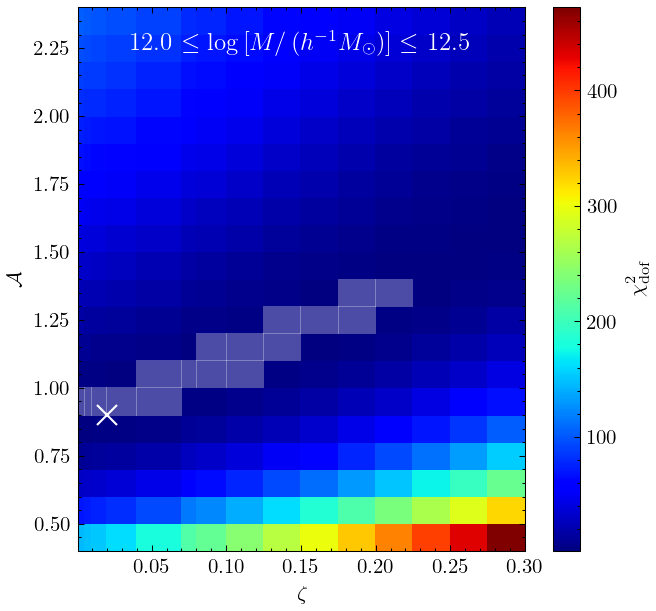

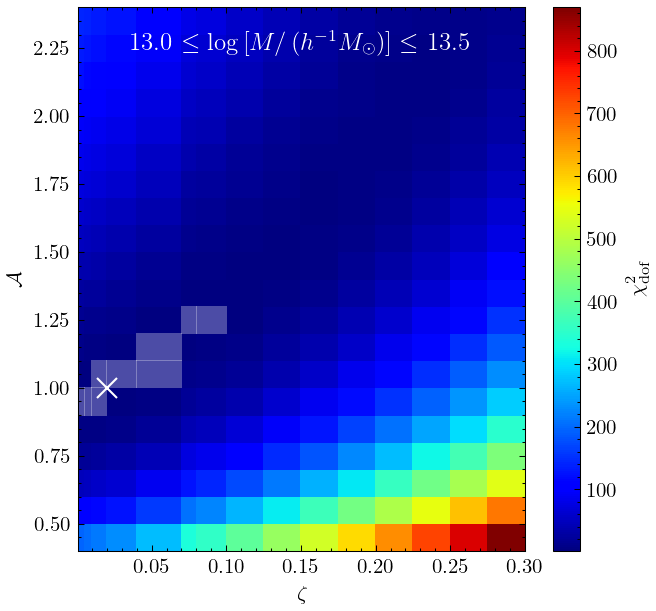

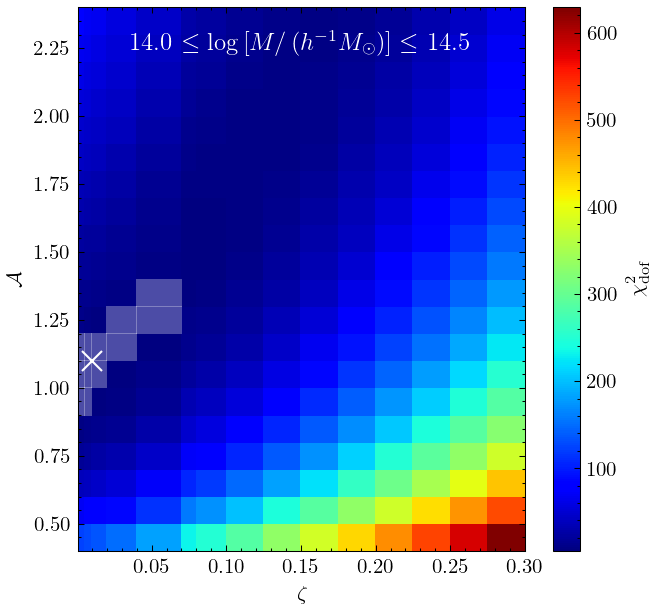

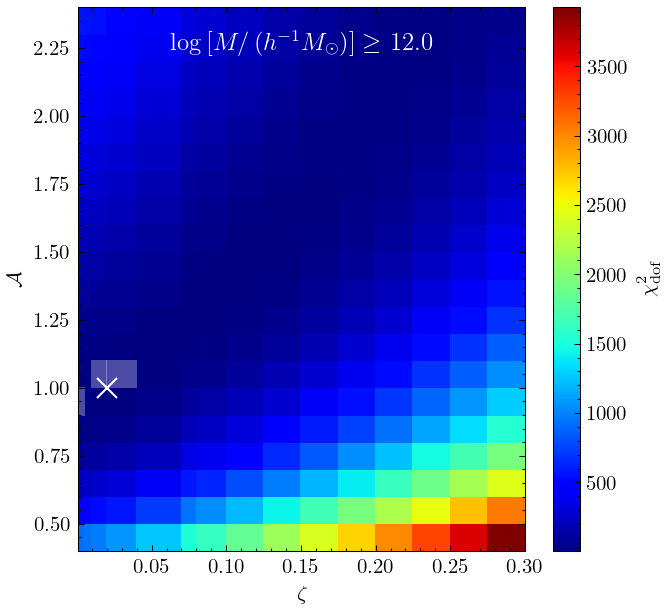

In [21]:
rlim = np.log10(OBJECTMASSCUT['SV'])
ReducedChi2dict_SV0_mplot = ReducedChi2dict_gen(cc_SV0, sh_SV0_new, centrals_mask_SV0, 'SV',
                                                     {12:(rlim, 11.9), 13:(rlim, 12.5), 14:(rlim, 13.0), 100:(rlim, 13.0)},
                                                     {12:10**12.0, 13:10**13.0, 14:10**14.0, 100:10**12.0},
                                                     {12:10**12.5, 13:10**13.5, 14:10**14.5, 100:cc_SV0['M'].max()}, mlim=OBJECTMASSCUT['SV'], mplot=True, dlog=False)
pcolorplots(ReducedChi2dict_SV0_mplot,
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 100:10**12.0},
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 100:cc_SV0['M'].max()})

SV nH cores 34592
SV nH_sh 34592
SV number of subhalos in bin 9298

SV nH cores 2418
SV nH_sh 2418
SV number of subhalos in bin 6713

SV nH cores 36
SV nH_sh 36
SV number of subhalos in bin 703

SV nH cores 47554
SV nH_sh 47554
SV number of subhalos in bin 29609

A 1.6 zeta 0.2
12.0 12.5
1.010803886419095 615.5268452820139

A 2.4 zeta 0.275
13.0 13.5
1.4784971420701067 438.2315284405537

A 1.9 zeta 0.2
14.0 14.5
0.8420926896270732 53.29469057708803

A 2.4 zeta 0.3
12.0 14.508623
2.0325999267935826 1999.1886872796995



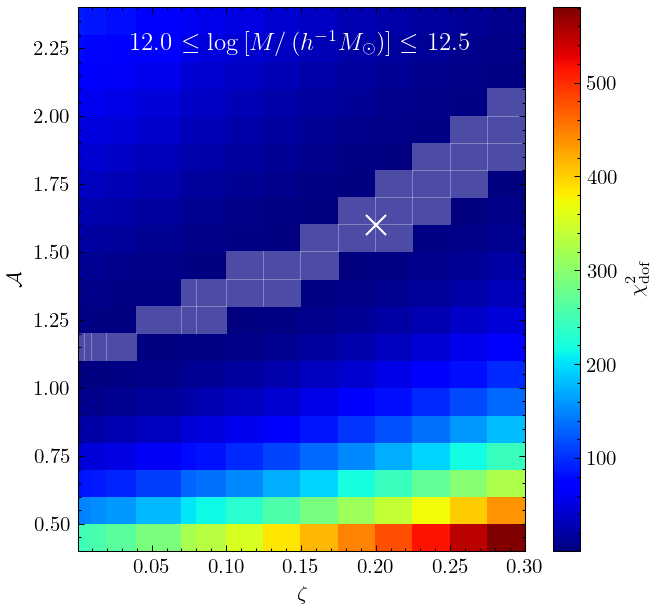

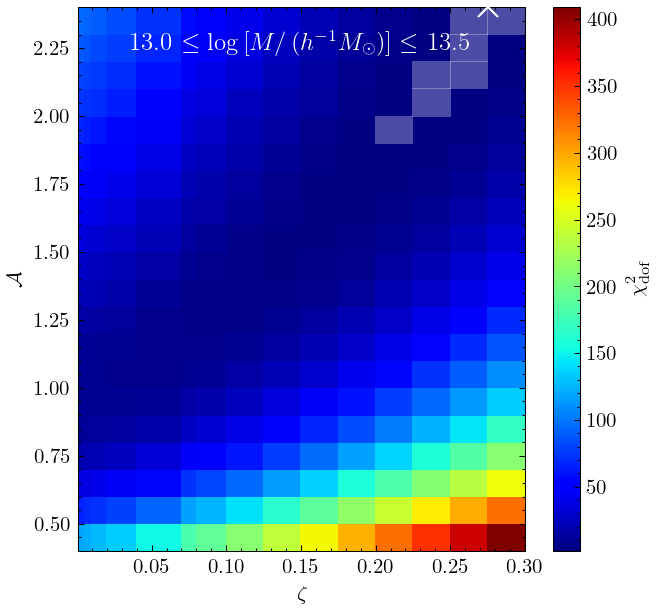

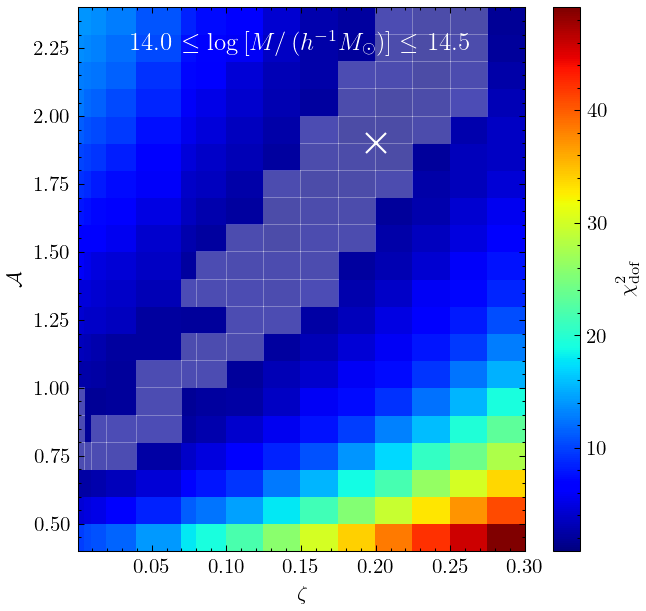

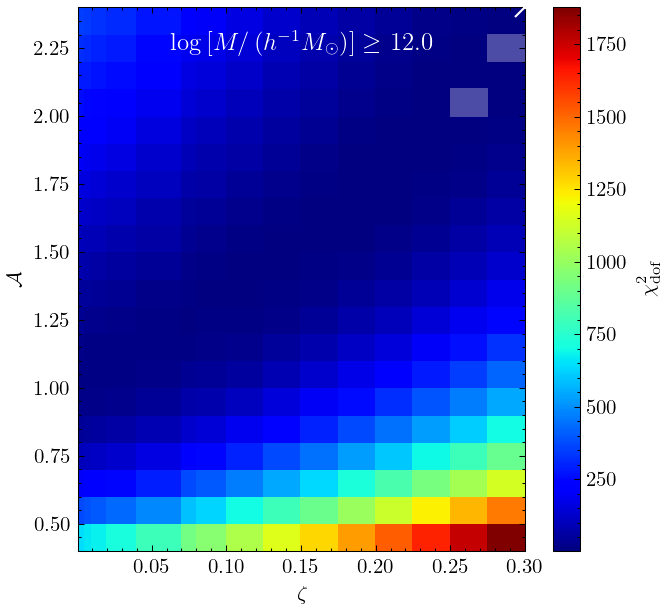

In [22]:
rlim = np.log10(OBJECTMASSCUT['SV'])
ReducedChi2dict_SV1_mplot = ReducedChi2dict_gen(cc_SV1, sh_SV1_new, centrals_mask_SV1, 'SV',
                                                     {12:(rlim, 11.9), 13:(rlim, 12.5), 14:(rlim, 13.0), 100:(rlim, 13.0)},
                                                     {12:10**12.0, 13:10**13.0, 14:10**14.0, 100:10**12.0},
                                                     {12:10**12.5, 13:10**13.5, 14:10**14.5, 100:cc_SV1['M'].max()}, mlim=OBJECTMASSCUT['SV'], mplot=True, dlog=False)
pcolorplots(ReducedChi2dict_SV1_mplot,
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 100:10**12.0},
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 100:cc_SV1['M'].max()})

A 1.2 zeta 0.1
12.0 12.5
3.108678129038106 562.0534035119804

A 1.6 zeta 0.15
13.0 13.5
3.9428134163937587 688.6684373205691

A 0.9 zeta 0.001
14.0 14.5
3.683106510163103 364.7832888957704

A 1.1 zeta 0.04
12.0 15.071189
9.313534905627753 3113.3751954581985



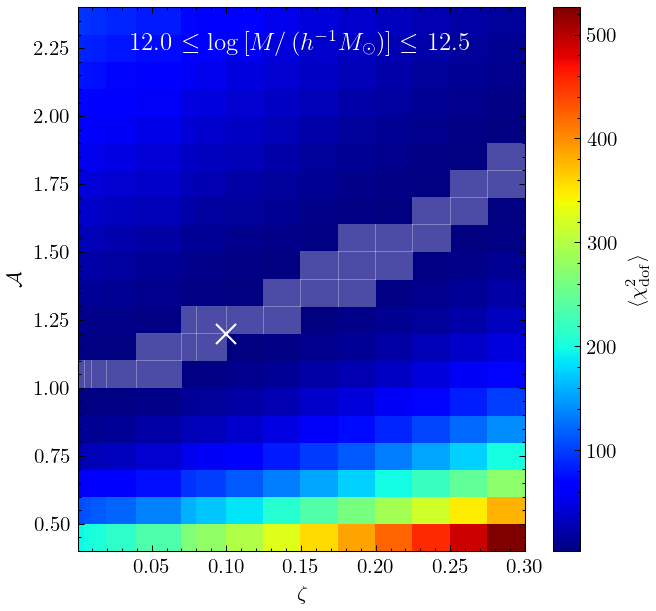

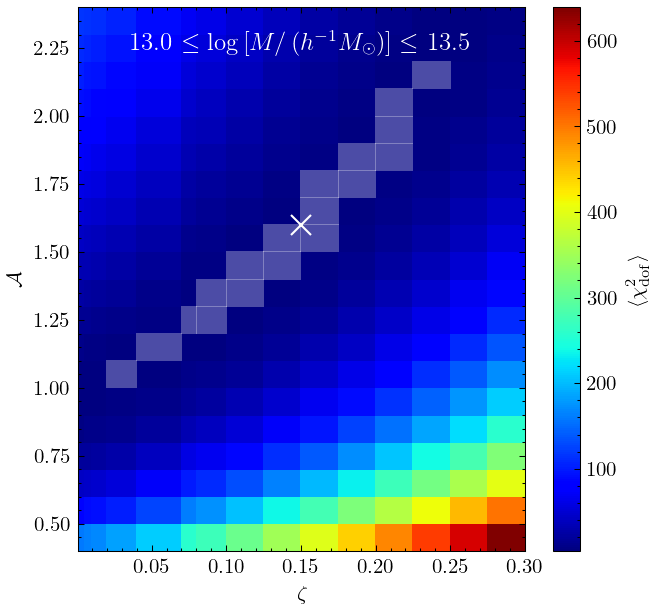

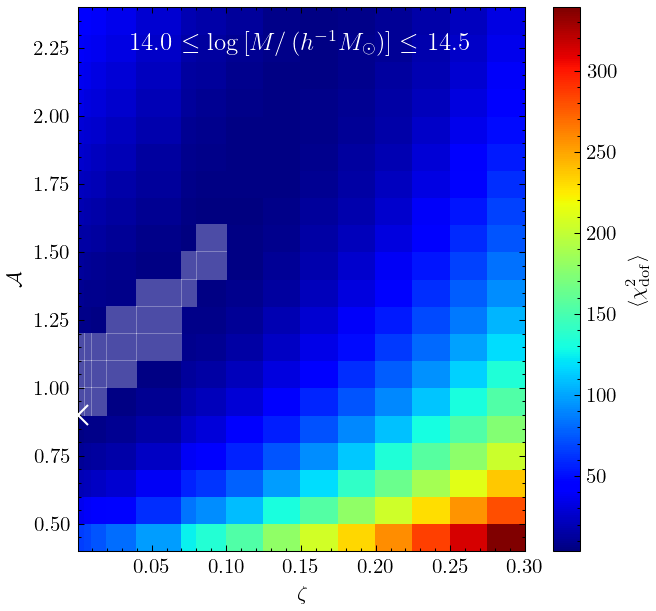

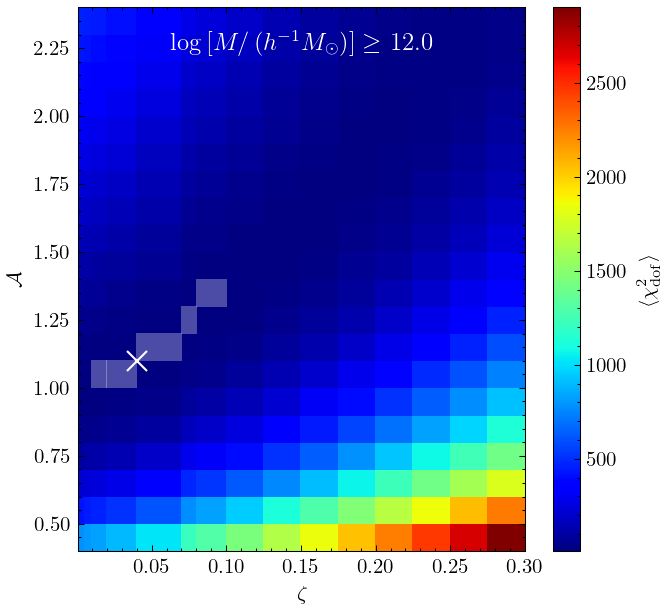

In [23]:
ReducedChi2dict_SVavg_mplot = {k:((ReducedChi2dict_SV0_mplot[k]+ReducedChi2dict_SV1_mplot[k])/2.0) for k in ReducedChi2dict_SV0_mplot.keys()}
pcolorplots(ReducedChi2dict_SVavg_mplot, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0, 100:10**12.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5, 100:cc_SV0['M'].max()},
            avgchi2=True,
            outfile=None)

SV nH_sh 40628
SV number of subhalos in bin 8901
len(Avals) 28
Abf:  1.2 zetabf:  0.1
SV nH cores 40628
xlim:  (11.07903847694397, 11.918065214157105) 
ylim:  (-1.6, 0.0)

SV nH_sh 4797
SV number of subhalos in bin 11269
len(Avals) 18
Abf:  1.6 zetabf:  0.15
SV nH cores 4797
xlim:  (11.065538835525512, 12.531565237045289) 
ylim:  (-0.64, 0.83)

SV nH_sh 337
SV number of subhalos in bin 6870
len(Avals) 19
Abf:  0.9 zetabf:  0.001
SV nH cores 337
xlim:  (11.05428867340088, 13.042814445495605) 
ylim:  (-0.65, 1.8)



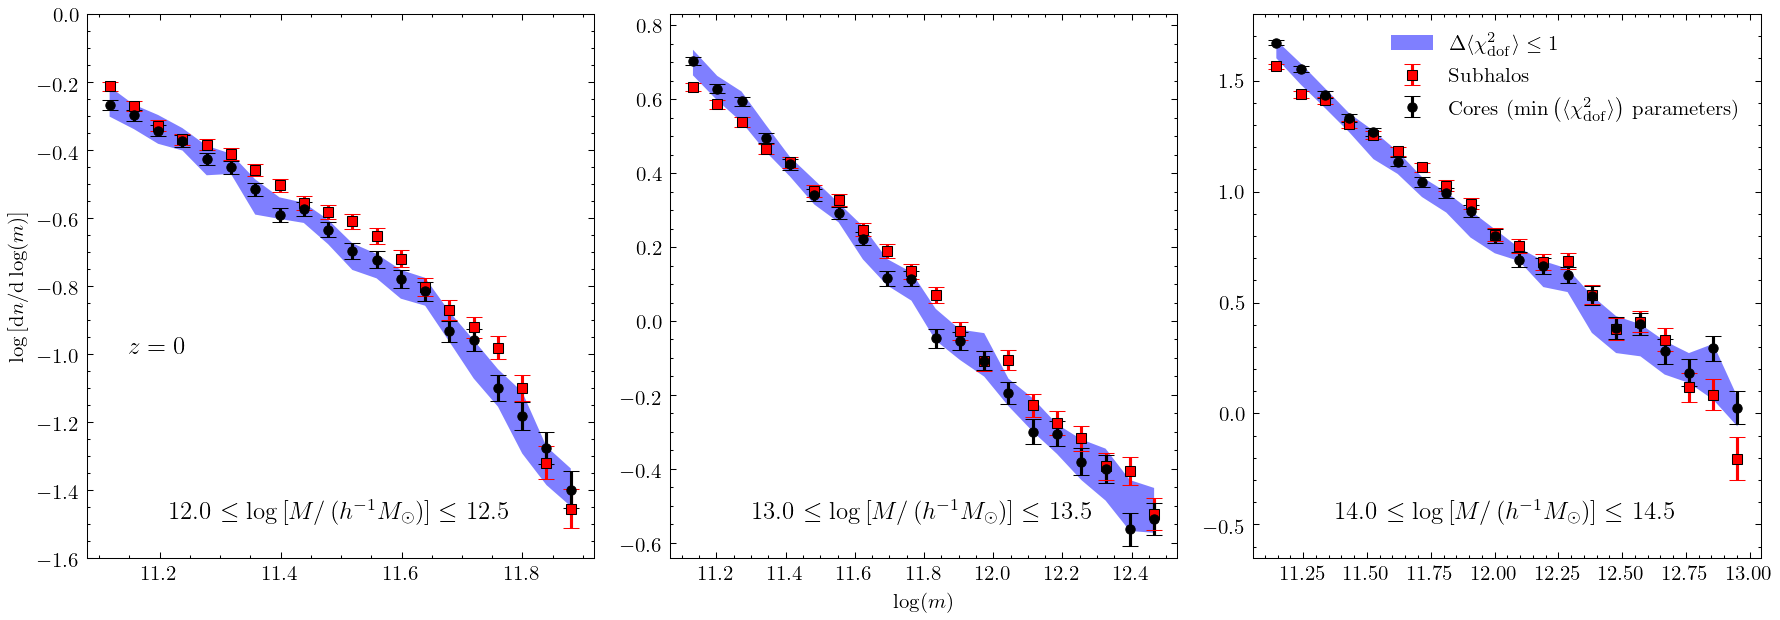

In [24]:
rlim = np.log10(OBJECTMASSCUT['SV'])
sigma1plots(cc_SV0, sh_SV0_new, centrals_mask_SV0, 'SV', 
            rdict={12:(rlim, 11.9), 13:(rlim, 12.5), 14:(rlim, 13.0)}, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5}, 
            ReducedChi2dict=ReducedChi2dict_SVavg_mplot, 
            mlim=OBJECTMASSCUT['SV'], mplot=True, avgchi2=True, zlabel='$z=0$', fixedAxis=True, outfile=None)

SV nH_sh 34592
SV number of subhalos in bin 9298
len(Avals) 28
Abf:  1.2 zetabf:  0.1
SV nH cores 34592
xlim:  (11.07903847694397, 11.918065214157105) 
ylim:  (-1.6, 0.0)

SV nH_sh 2418
SV number of subhalos in bin 6713
len(Avals) 18
Abf:  1.6 zetabf:  0.15
SV nH cores 2418
xlim:  (11.065538835525512, 12.531565237045289) 
ylim:  (-0.64, 0.83)

SV nH_sh 36
SV number of subhalos in bin 703
len(Avals) 19
Abf:  0.9 zetabf:  0.001
SV nH cores 36
xlim:  (11.05428867340088, 13.042814445495605) 
ylim:  (-0.65, 1.8)



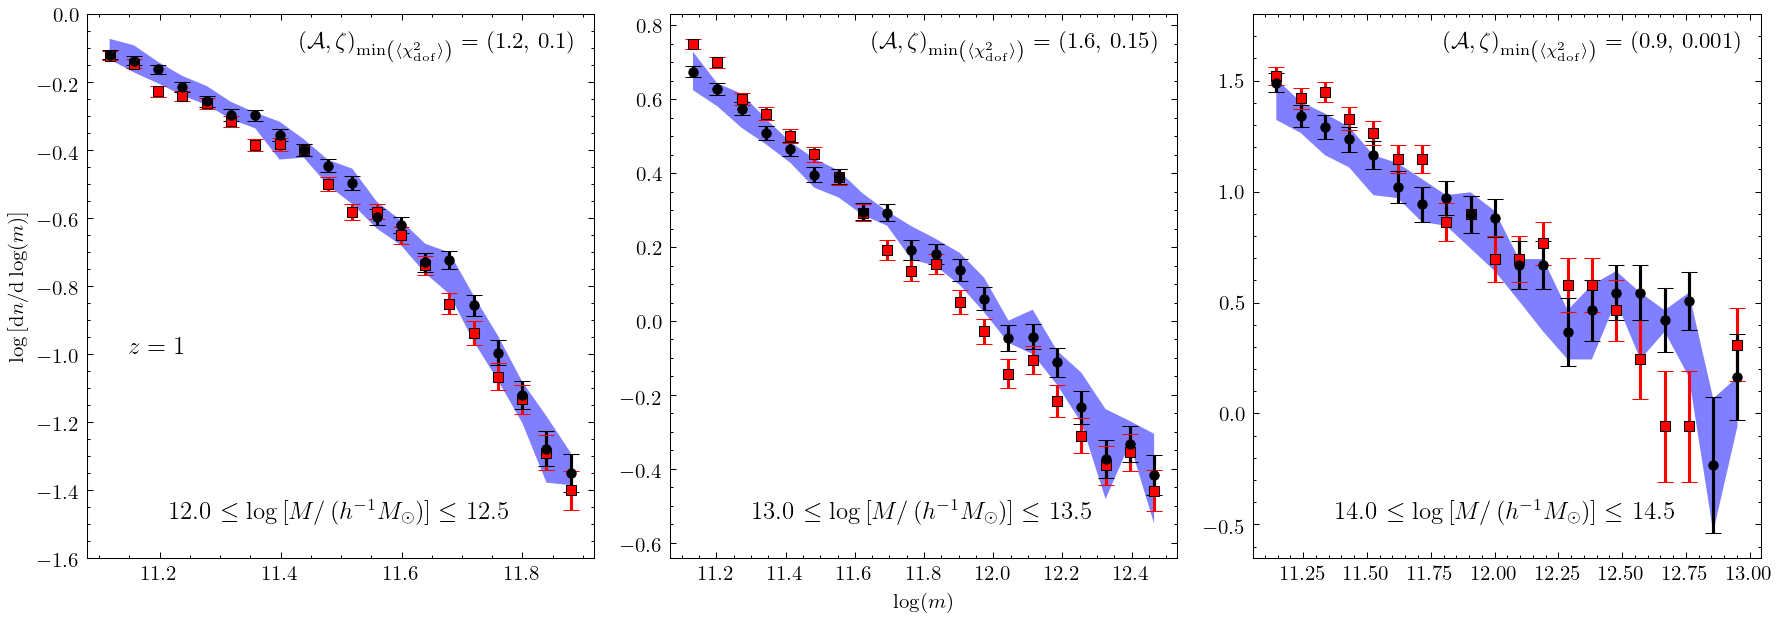

In [25]:
# z=1 1sigma
rlim = np.log10(OBJECTMASSCUT['SV'])
sigma1plots(cc_SV1, sh_SV1_new, centrals_mask_SV1, 'SV', 
            rdict={12:(rlim, 11.9), 13:(rlim, 12.5), 14:(rlim, 13.0)}, 
            M1dict={12:10**12.0, 13:10**13.0, 14:10**14.0}, 
            M2dict={12:10**12.5, 13:10**13.5, 14:10**14.5}, 
            ReducedChi2dict=ReducedChi2dict_SVavg_mplot, 
            mlim=OBJECTMASSCUT['SV'], mplot=True, avgchi2=True, legendFlag=False, zlabel='$z=1$', fixedAxis=True, bfparamslabelFlag=True, outfile=None)

SV nH_sh 40628
SV number of subhalos in bin 8901
SV nH cores 40628
SV nH cores 40628
SV nH_sh 4797
SV number of subhalos in bin 11269
SV nH cores 4797
SV nH cores 4797
SV nH_sh 337
SV number of subhalos in bin 6870
SV nH cores 337
SV nH cores 337
SV nH_sh 61500
SV number of subhalos in bin 51225
SV nH cores 61500
SV nH cores 61500


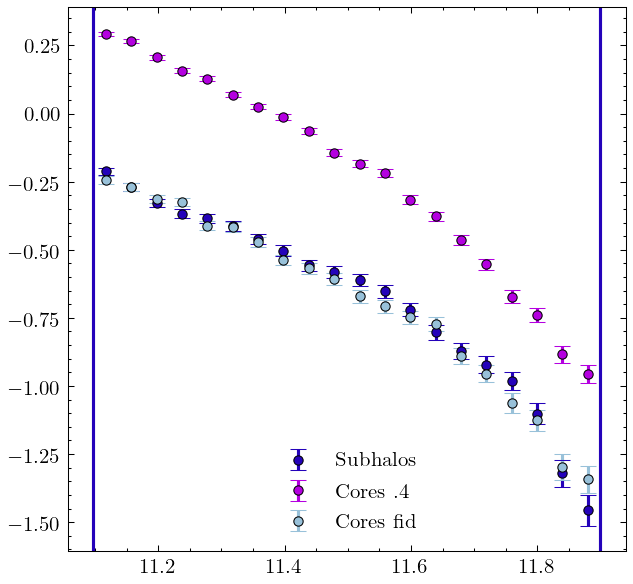

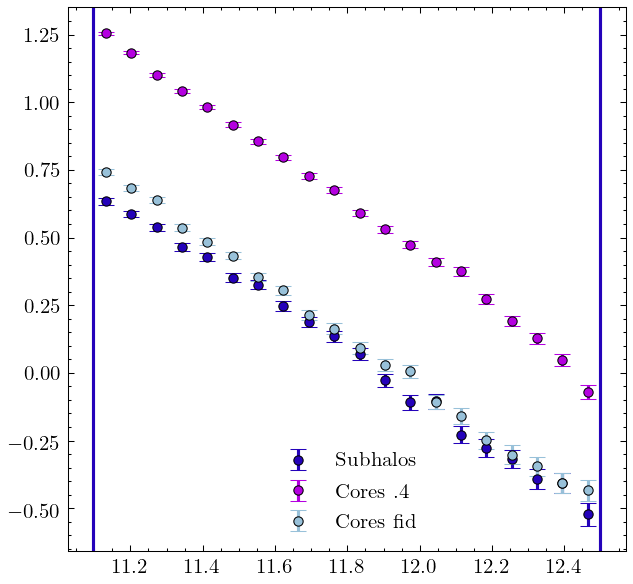

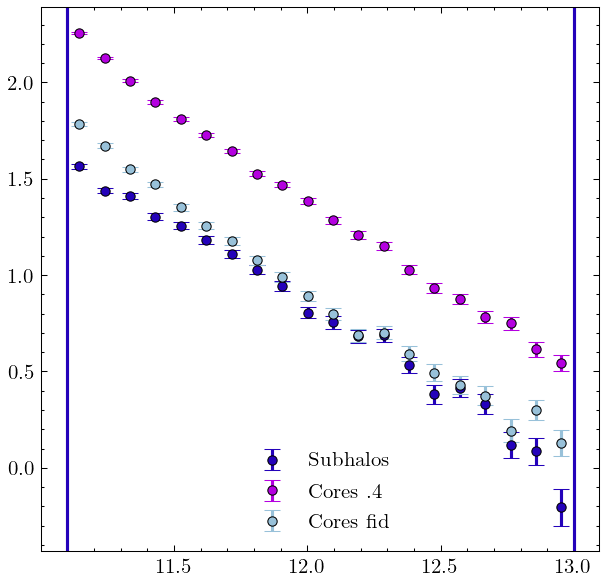

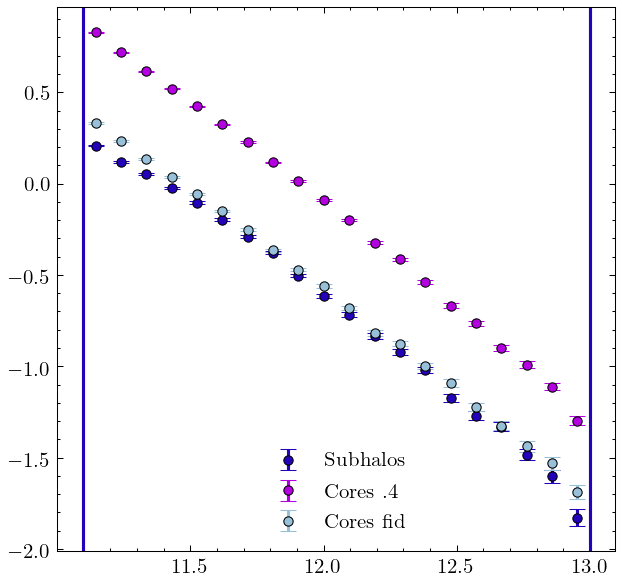

In [19]:
#testing: determine range
cc, centrals_mask, sh = cc_SV0, centrals_mask_SV0, sh_SV0_new
# cc, centrals_mask, sh = cc_SV1, centrals_mask_SV1, sh_SV1_new

bins = 20
alpha = .8
label = 'SV'
mplot = True

mlim = OBJECTMASSCUT[label]

rlim = np.log10(OBJECTMASSCUT[label])
rdict = {12:(rlim, 11.9), 13:(rlim, 12.5), 14:(rlim, 13.0), 'ALL':(rlim, 13.0)}
M1dict = {12:10**12.0, 13:10**13.0, 14:10**14.0, 'ALL':10**12.0}
M2dict = {12:10**12.5, 13:10**13.5, 14:10**14.5, 'ALL':cc['M'].max()}

for i in [12, 13, 14, 'ALL']:
    plt.figure()
    r, M1, M2 = rdict[i], M1dict[i], M2dict[i]
    plt.axvline(r[0])
    plt.axvline(r[1])
    #r=None

    x_sh, y_sh, yerr_sh, yerr_log_sh, nH_sh = subhalo_plot(sh, M1, M2, label, bins, r, mlim=mlim, mplot=mplot)
    errorbar(plt, x_sh, y_sh, yerr=yerr_log_sh, label='Subhalos', marker='o')

    x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=mlim, A=0.4, zeta=0.3, mplot=mplot)
    errorbar(plt, x, y, yerr=yerr_log, label='Cores .4', marker='o')

    x, y, yerr, yerr_log, nH_cores = cores_plot(cc, centrals_mask, M1, M2, label, bins, r, mlim=mlim, A=AFID, zeta=ZETAFID, mplot=mplot)
    errorbar(plt, x, y, yerr=yerr_log, label='Cores fid', marker='o')

    # print plt.xlim()
    plt.legend()